In [1]:
import io, os, sys, types
from IPython import get_ipython
from Utils import NotebookFinder
import pandas as pd
from Attack_RF import attack_RF
from config_fileRF import config
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt  
import numpy as np
from Data_preprocessing import procedata
import warnings
from sklearn.decomposition import PCA
import time 

importing Jupyter notebook from Attack_RF.ipynb
importing Jupyter notebook from config_fileRF.ipynb
importing Jupyter notebook from Data_preprocessing.ipynb
importing Jupyter notebook from Smoteclass.ipynb


In [2]:
n_components =list(range(3,81,3))
n_splits_k =  config["RF"]["n_splits_k"]

In [3]:
def run_pca():
    datasets = pd.read_csv("data/attack_RF.csv")
    print (datasets.shape) 
    features = datasets.iloc[:, :-1]
    labels = datasets.iloc[:, -1]
    skf = StratifiedKFold(n_splits=n_splits_k,random_state = 2)
    # The accracy_of_classes list holds the accuracy of each compromise
    accracy_of_classes = []
    # The precision_of_classes list holds the precision of each class in each compromise test set
    precision_of_classes = []
    # The recall_of_classes list holds the recall value of each class in each compromise test set
    recall_of_classes = []
    # The f1_of_classes list holds the f1 value of each class in each compromise test set
    f1_of_classes = []
    # flag is used to mark whether to output the training set and test set size，
    # flag = 0 means no output, flag = 1 means output
    flag = 0 
    accuracy_mean = []
    length_components = len(n_components)
    components_flag = 0
    precision_com =  np.zeros((14,length_components))
    recall_com= np.zeros((14,length_components))
    f1_com= np.zeros((14,length_components))
    time_list = []
    for n_com in n_components:
        print("pca compressed dimension is：",n_com)
        estimator = PCA(n_components=n_com)
        for train_index, test_index in skf.split(features,labels):  
            start = time.clock()
            # The following is the training and test set segmentation process
            features_train = features.iloc[train_index]
            features_test =  features.iloc[test_index]
            labels_train = labels.iloc[train_index]
            labels_test =  labels.iloc[test_index]
            features_train = features_train.values
            labels_train = labels_train.values
            features_test = features_test.values
            labels_test = labels_test.values
            labels_train = labels_train.reshape(len(labels_train))
            labels_test = labels_test.reshape(len(labels_test))
            if flag==0:
                print("Number of examples in the train set:",labels_train.shape)
                print("Number of examples in the test set:",labels_test.shape)
                flag = 1
            # attack_RF returns the accuracy of each test set and the precision, recall, and f1 values of each class 
            features_train_pca = estimator.fit_transform(features_train)
            features_test_pca = estimator.transform(features_test)
            accuracy,precision,recall,f1 = attack_RF(features_train_pca,labels_train,features_test_pca,labels_test)
            precision_of_classes.append(precision)
            recall_of_classes.append(recall)
            f1_of_classes.append(f1)
            accracy_of_classes.append(accuracy)
        
        end = time.clock()
        total_time = end - start
        time_list.append(total_time)
        print("Running time: %s seconds"%(end - start))
        # Find the average of all the precisions in all prediction sets in each compromise
        precision_mean=np.mean(precision_of_classes,axis=0)
        # Find the average of all the recall value in all prediction sets in each compromise
        recall_mean = np.mean( recall_of_classes,axis=0)
        # Find the average of all the f1 value in all prediction sets in each compromise
        f1_mean = np.mean(f1_of_classes,axis=0)
        acc_avg = np.mean(accracy_of_classes)
        accuracy_mean.append(acc_avg)
        for i in range(14):
            precision_com[i][components_flag] = precision_mean[i]
            recall_com[i][components_flag] = recall_mean[i]
            f1_com[i][components_flag] = f1_mean[i]
        print("accuracy_mean value is :",acc_avg)
        # Visualize the precision average, recall average, and f1 average of all classes in each compromise.
        plt.figure()
        x = range(1,len(precision)+1)
        y1 = precision_mean
        y2 = recall_mean
        y3 = f1_mean
        pre = plt.plot(x,y1,label = "precision")
        rec = plt.plot(x,y2,label = "recall")
        f1_ = plt.plot(x,y3,label = "f1") 
        plt.xlabel('labels of attack')
        plt.legend(['precision','recall','f1'])
        plt.show()
        
        plt.figure()
        x = n_components[0:components_flag+1]
        y1 = accuracy_mean
        acc_mean = plt.plot(x,y1,label = "accuracy_mean")   
        plt.xlabel('n_component')
        plt.ylabel('accuracy mean')
        plt.show()
        
        for i in range(14):   
            plt.figure()
            x = n_components[0:components_flag+1]
            y1 = precision_com[i][0:components_flag+1]
            y2 = recall_com[i][0:components_flag+1]
            y3 = f1_com[i][0:components_flag+1]
            pre = plt.plot(x,y1,label = "precision of label{}".format(i+1))
            rec = plt.plot(x,y2,label = "recall of label{}".format(i+1))
            f1_ = plt.plot(x,y3,label = "f1 of label{}".format(i+1)) 
            plt.xlabel('n_component')
            plt.legend(["precision of label{}".format(i+1),"recall of label{}".format(i+1),"f1 of label{}".format(i+1)])
            plt.show()
        components_flag +=1
    plt.figure()
    x = n_components[0:components_flag+1]
    y1 = time_list
    acc_mean = plt.plot(x,y1,label = "Change_of_time")   
    plt.xlabel('n_component')
    plt.ylabel('Change_of_time')
    plt.show()

(1252936, 82)
pca compressed dimension is： 3
Number of examples in the train set: (1127635,)
Number of examples in the test set: (125301,)
Running time: 46.65124139999995 seconds
accuracy_mean value is : 0.9507929549467524


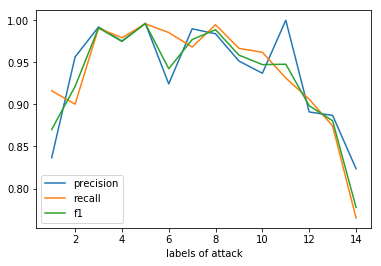

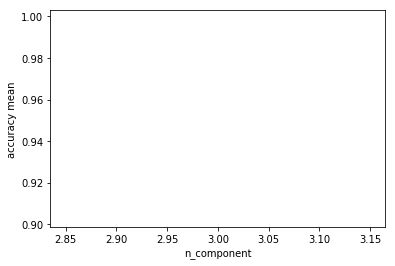

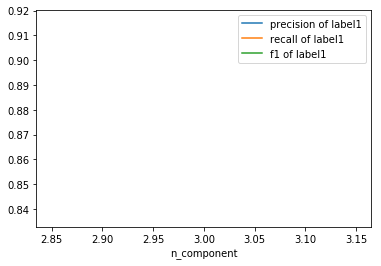

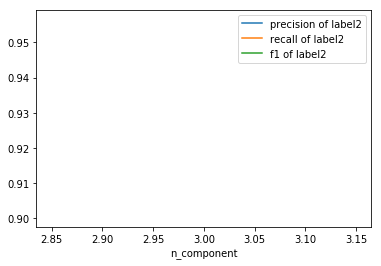

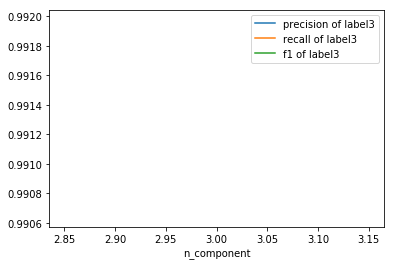

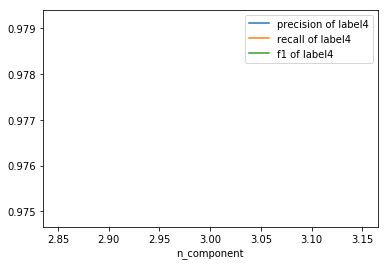

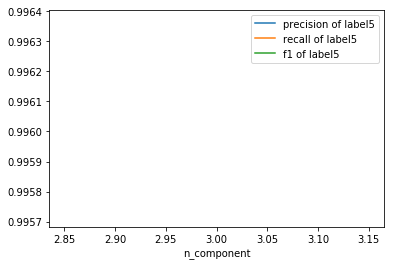

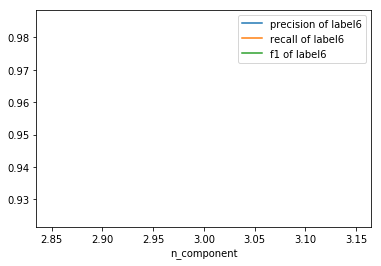

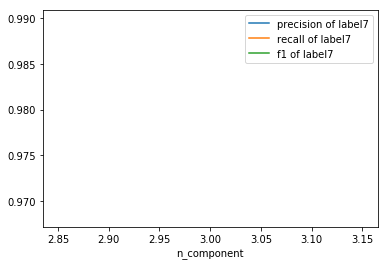

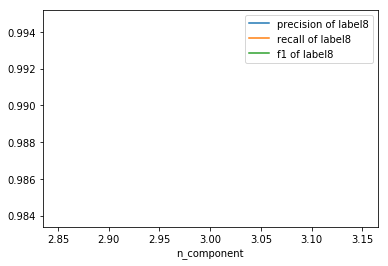

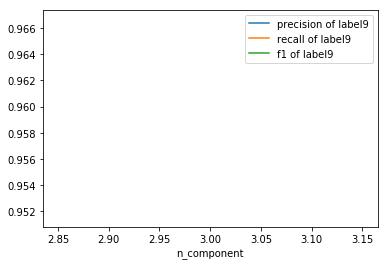

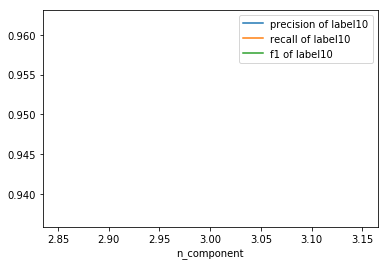

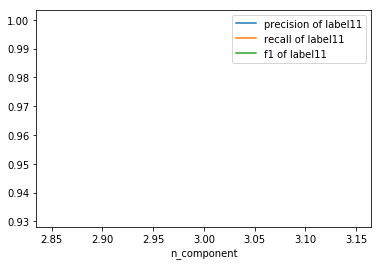

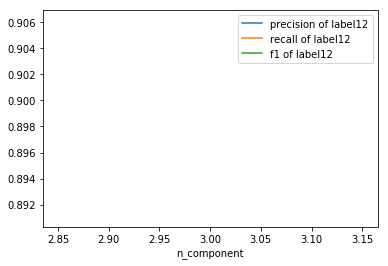

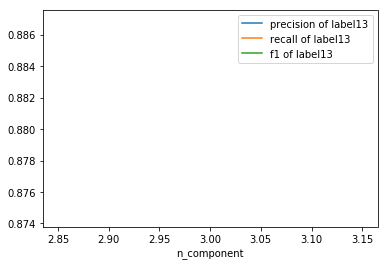

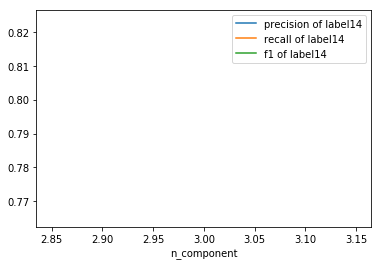

pca compressed dimension is： 6
Running time: 77.26178489999984 seconds
accuracy_mean value is : 0.9657685939818099


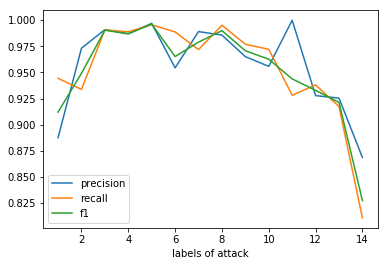

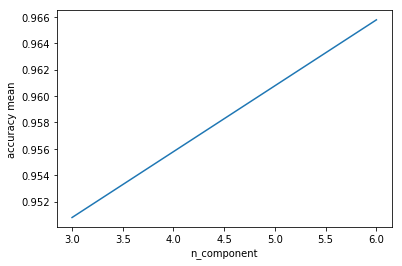

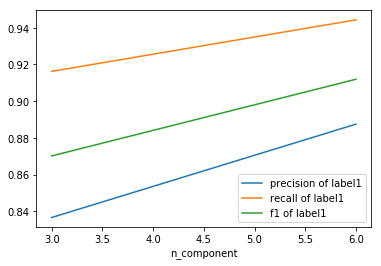

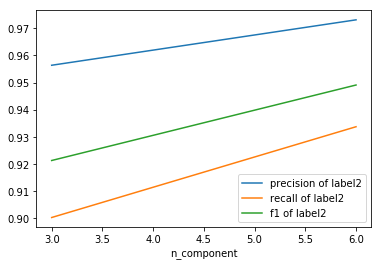

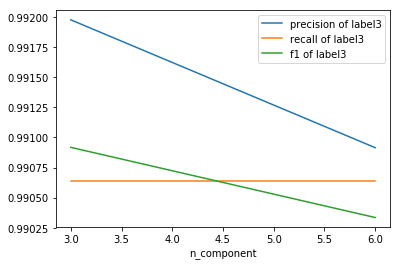

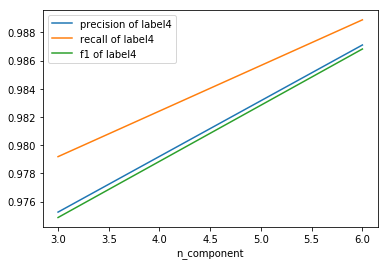

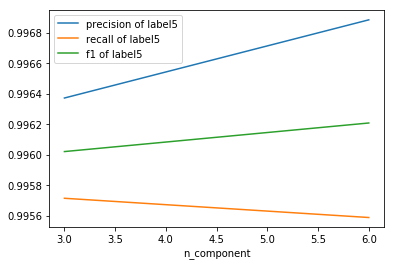

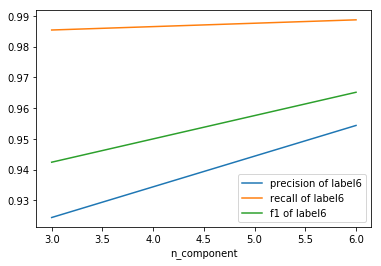

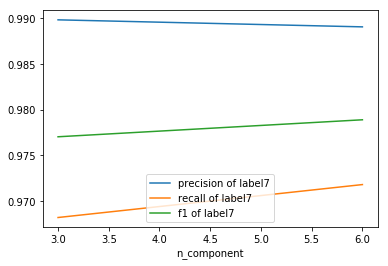

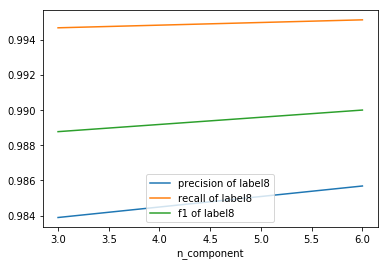

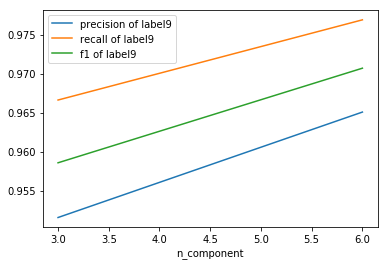

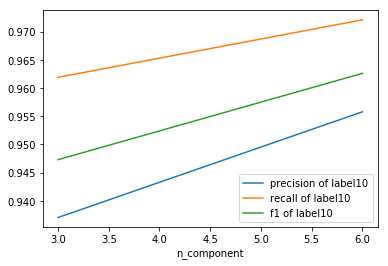

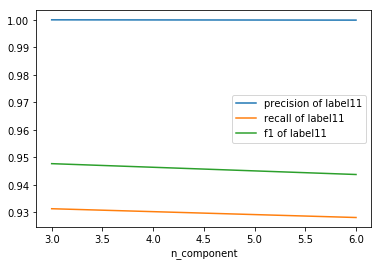

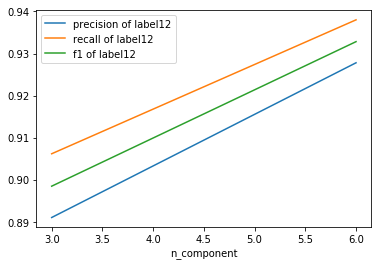

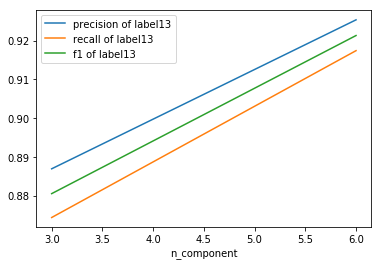

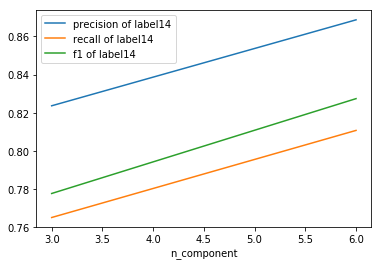

pca compressed dimension is： 9
Running time: 93.24878669999998 seconds
accuracy_mean value is : 0.9721268652245706


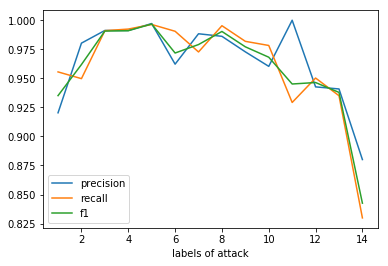

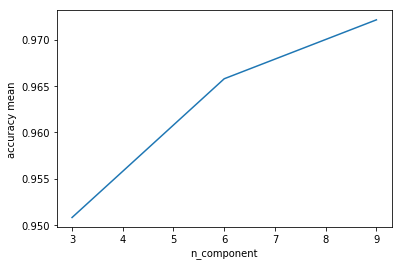

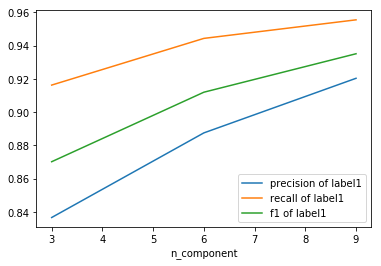

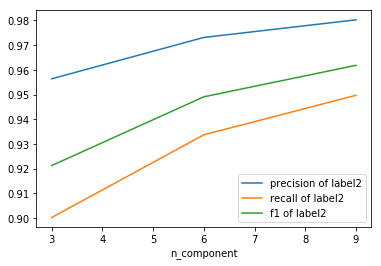

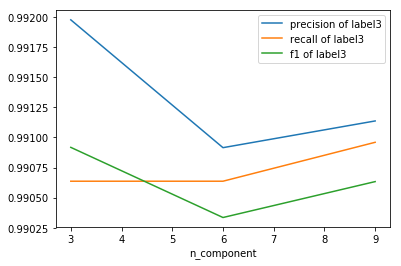

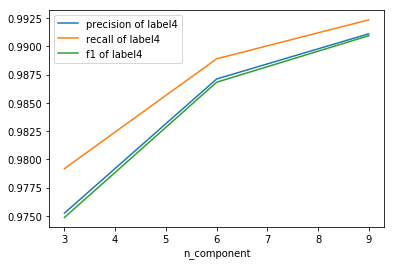

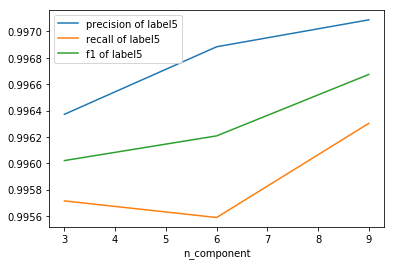

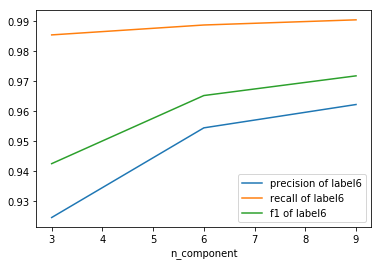

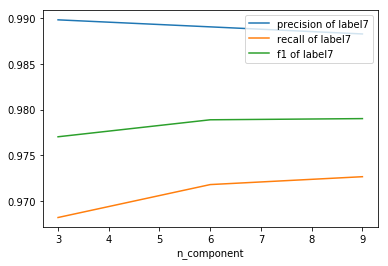

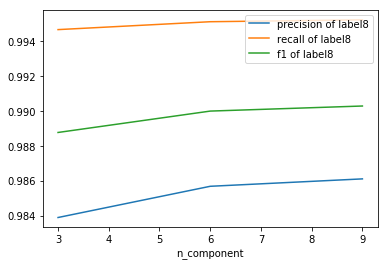

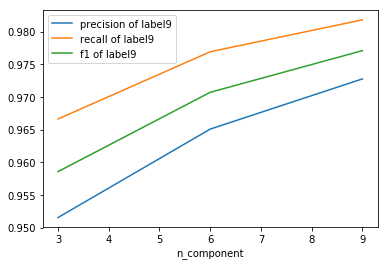

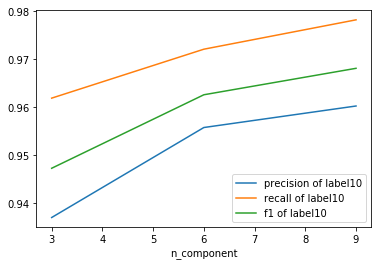

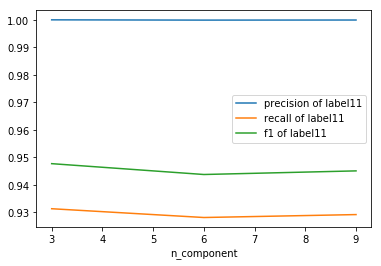

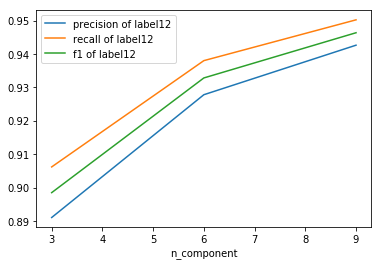

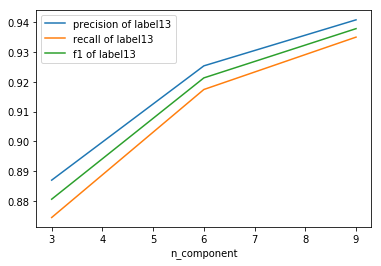

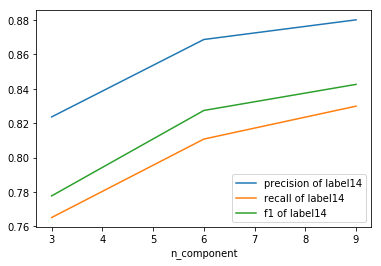

pca compressed dimension is： 12
Running time: 91.49297650000017 seconds
accuracy_mean value is : 0.9755520481720776


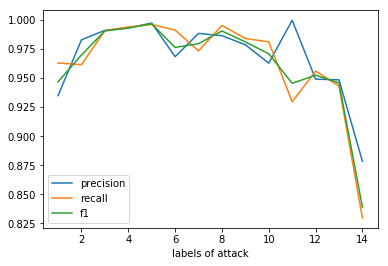

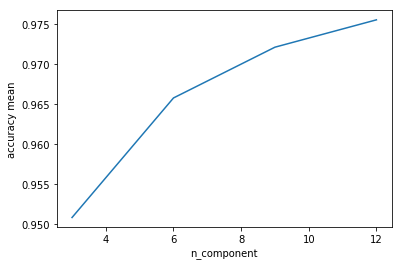

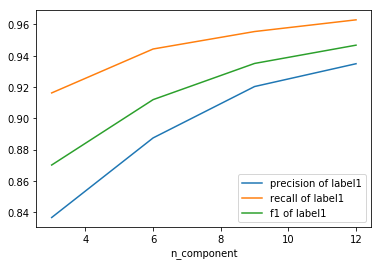

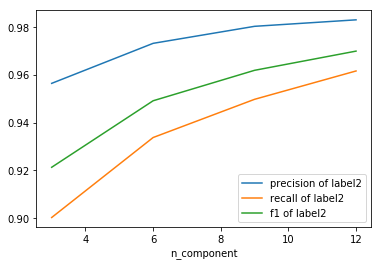

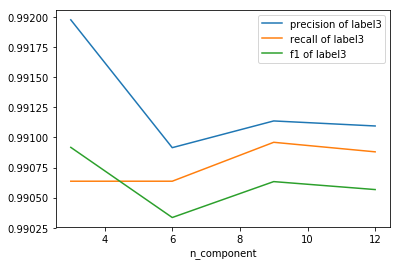

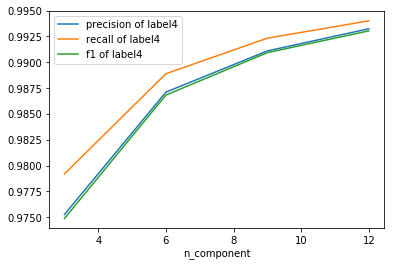

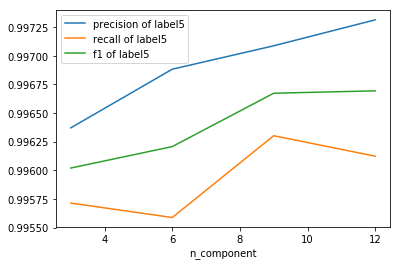

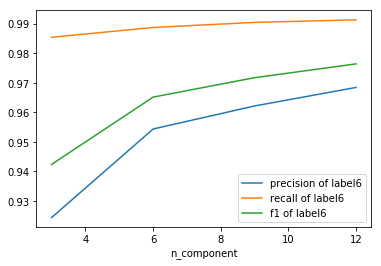

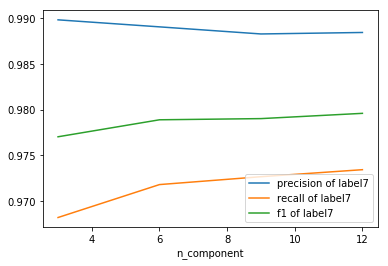

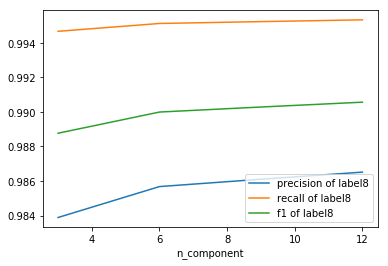

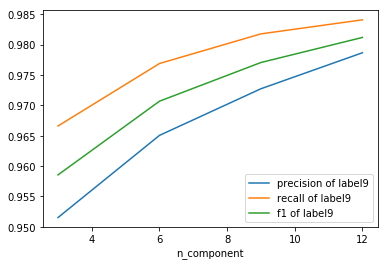

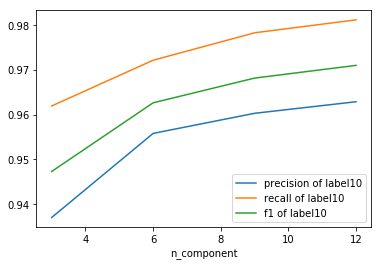

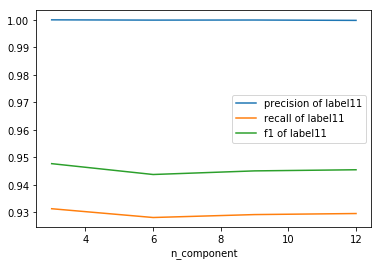

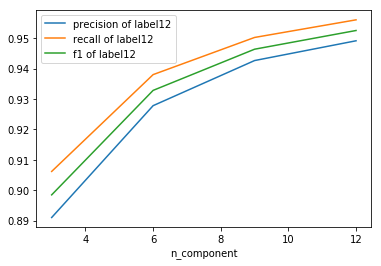

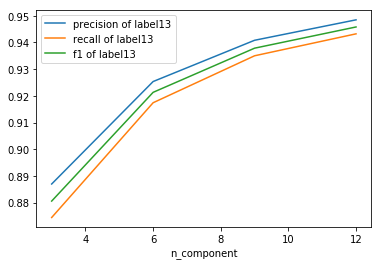

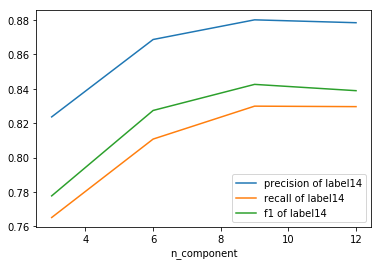

pca compressed dimension is： 15
Running time: 87.20105349999994 seconds
accuracy_mean value is : 0.9778370187805819


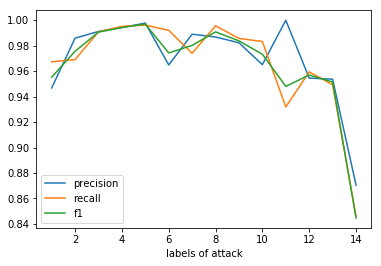

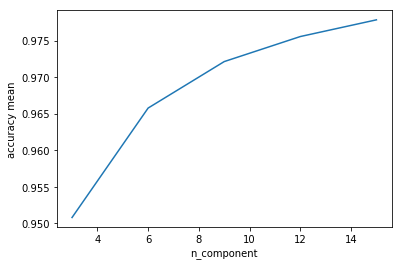

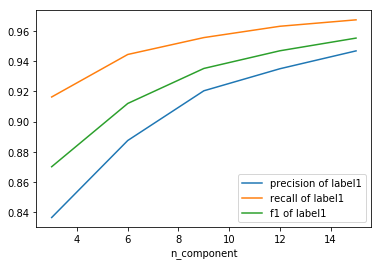

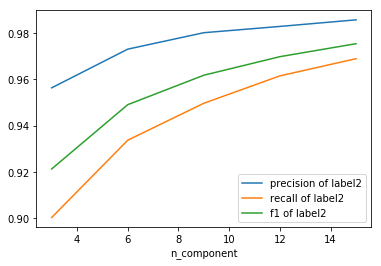

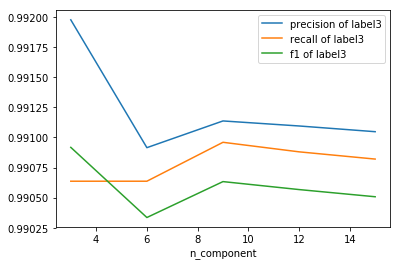

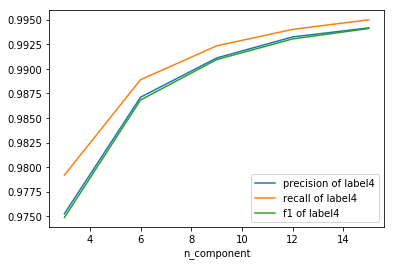

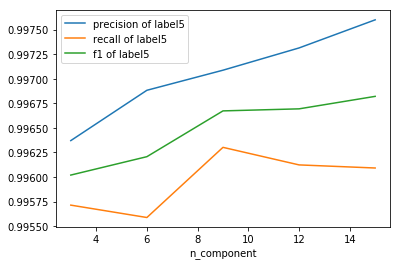

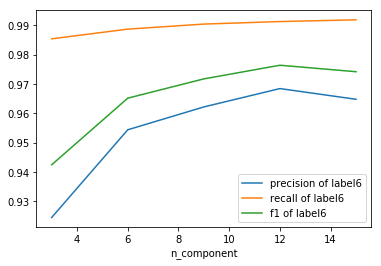

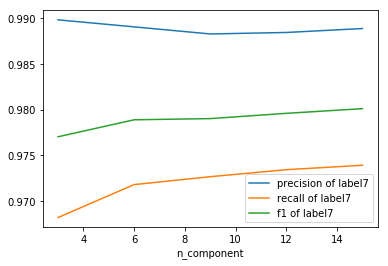

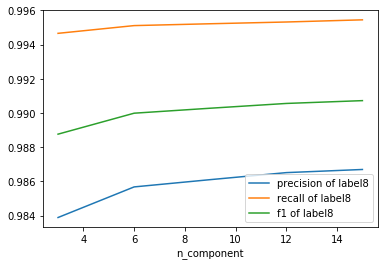

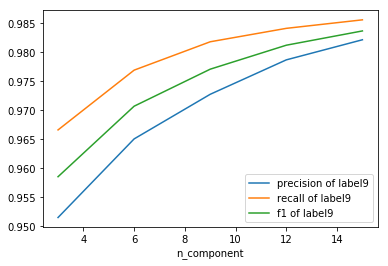

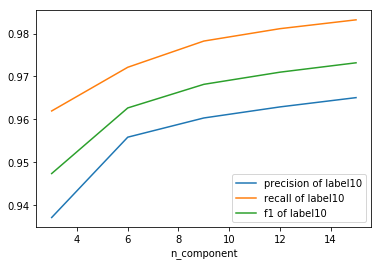

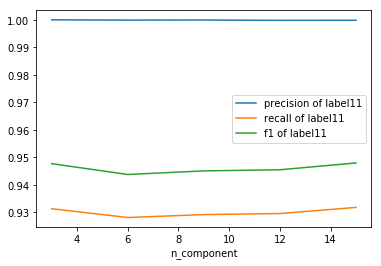

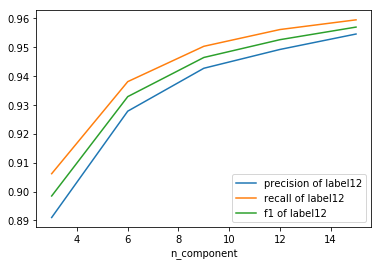

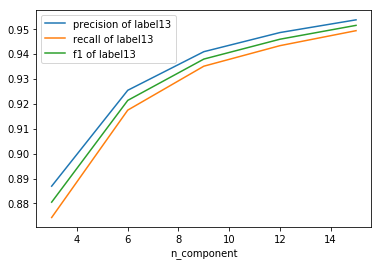

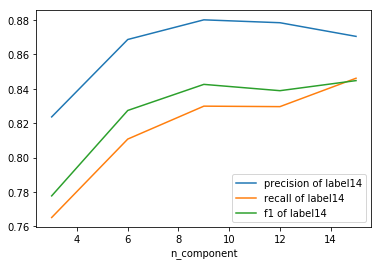

pca compressed dimension is： 18
Running time: 112.59114049999971 seconds
accuracy_mean value is : 0.9796370166004333


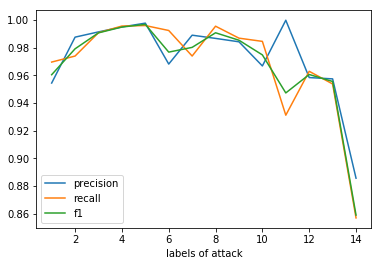

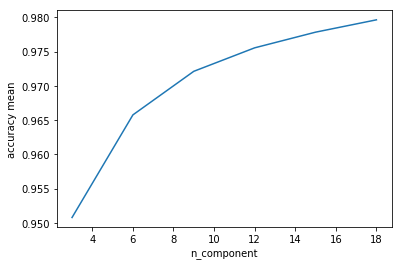

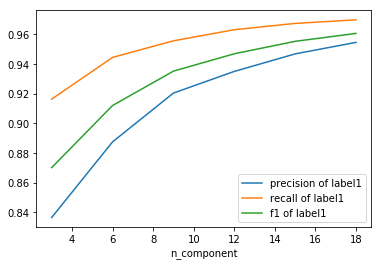

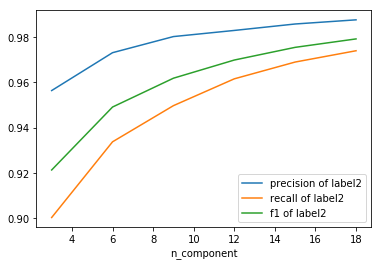

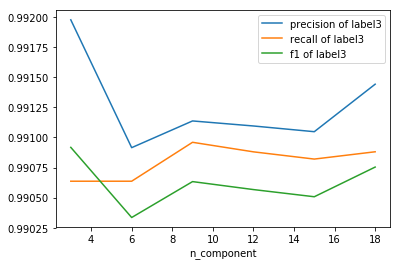

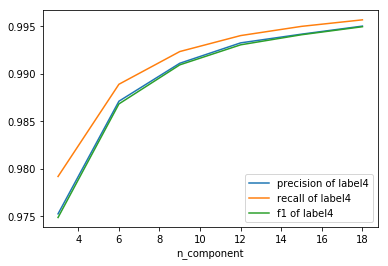

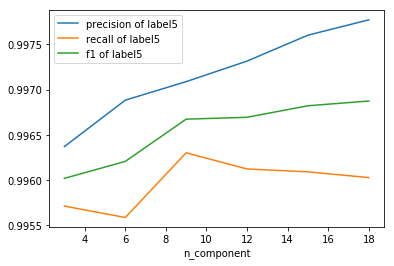

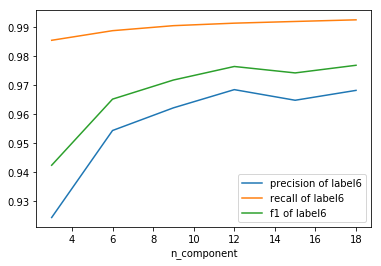

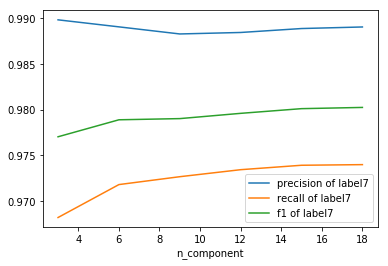

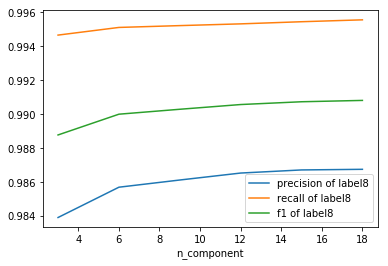

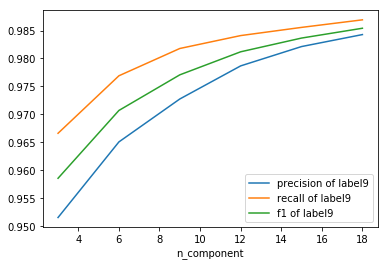

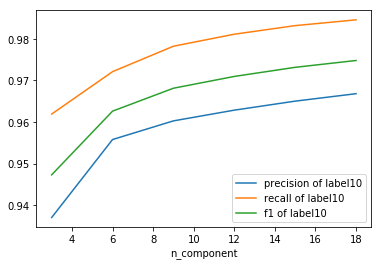

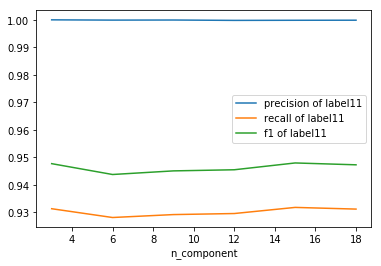

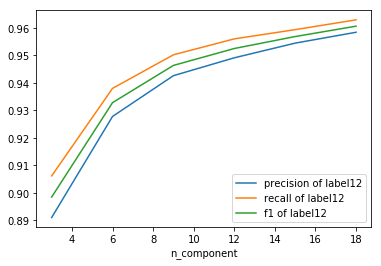

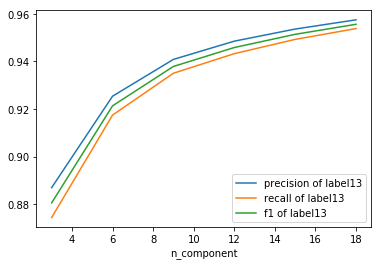

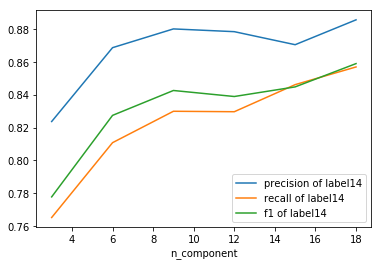

pca compressed dimension is： 21
Running time: 133.92394029999923 seconds
accuracy_mean value is : 0.9809321916594781


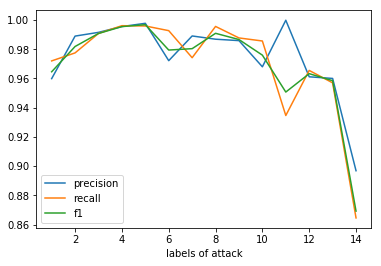

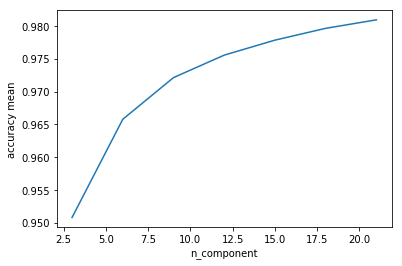

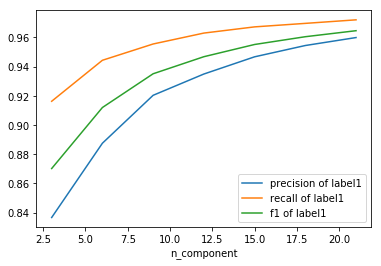

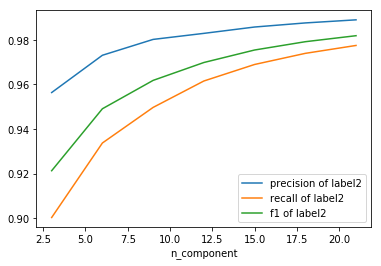

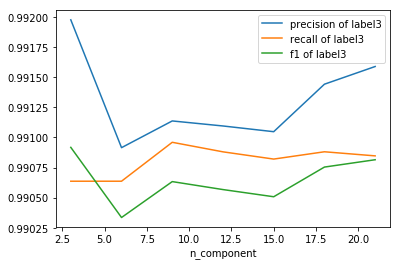

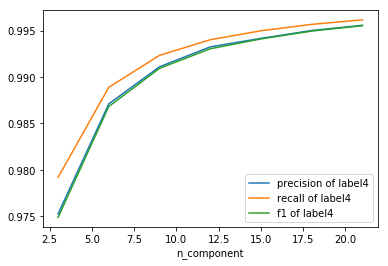

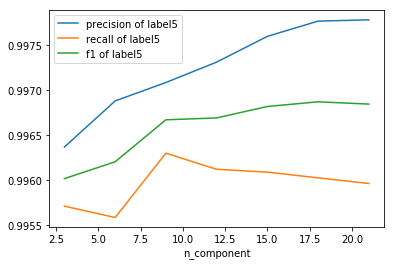

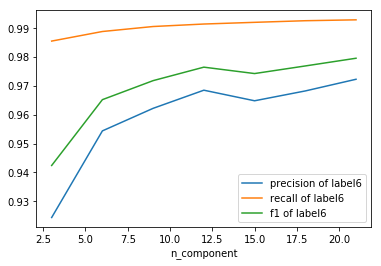

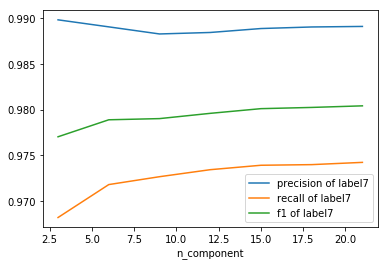

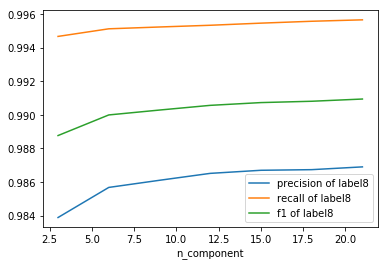

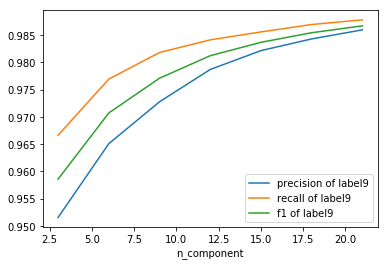

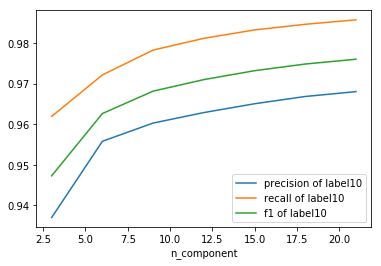

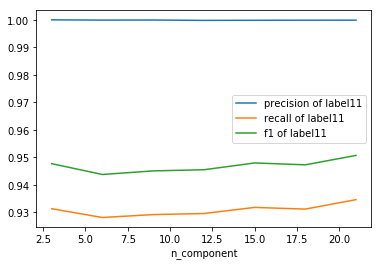

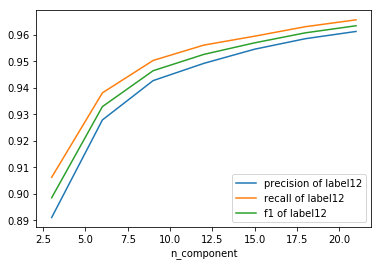

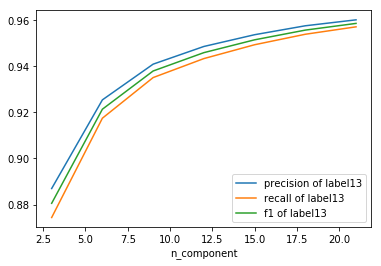

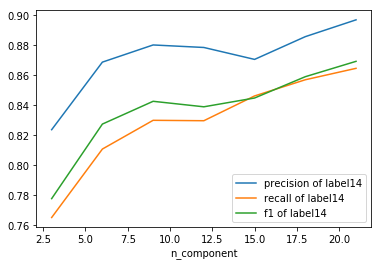

pca compressed dimension is： 24
Running time: 140.08944799999972 seconds
accuracy_mean value is : 0.9819341029598142


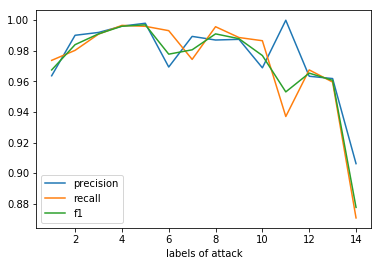

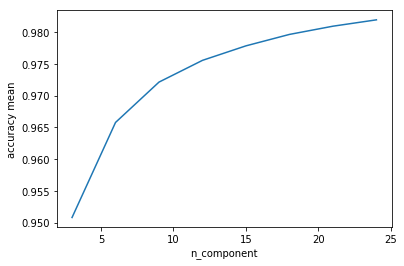

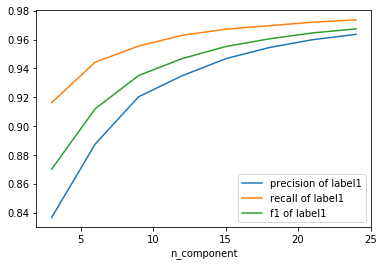

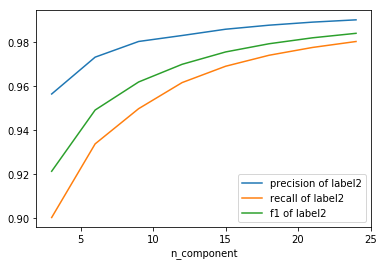

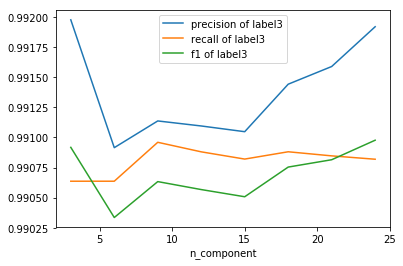

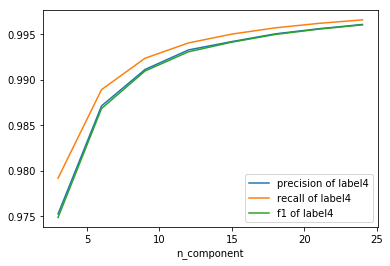

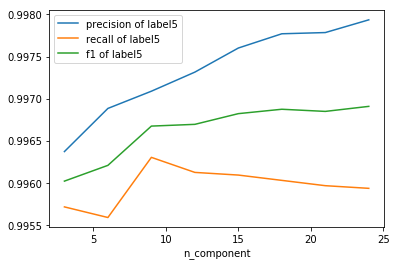

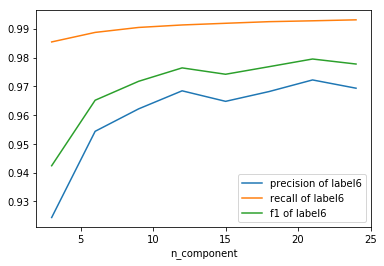

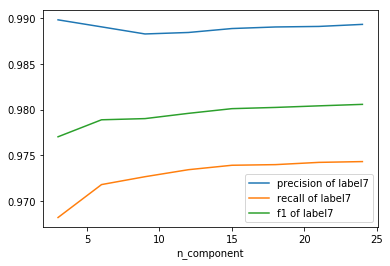

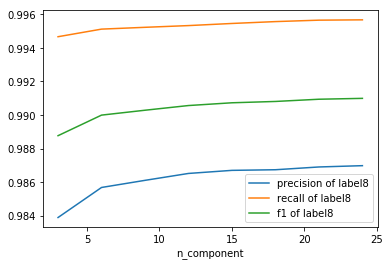

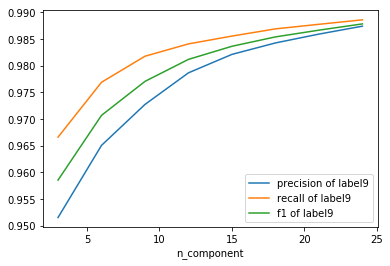

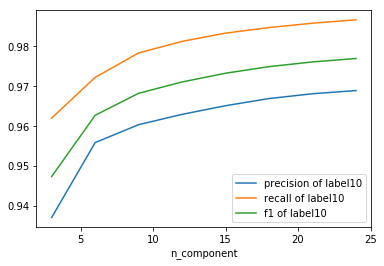

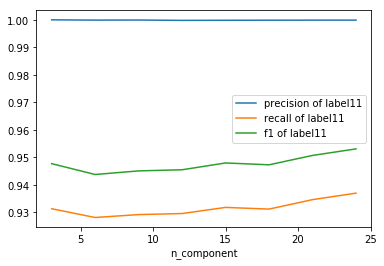

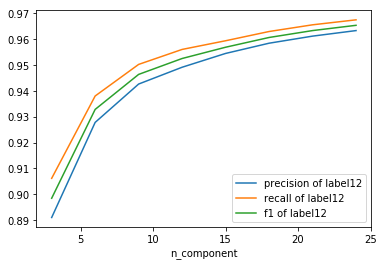

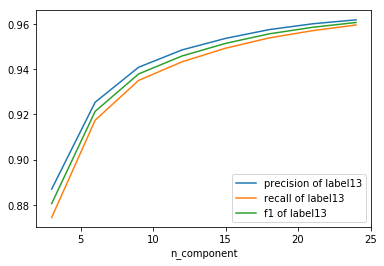

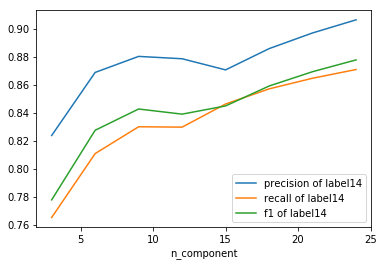

pca compressed dimension is： 27
Running time: 138.78359009999986 seconds
accuracy_mean value is : 0.9827602811966603


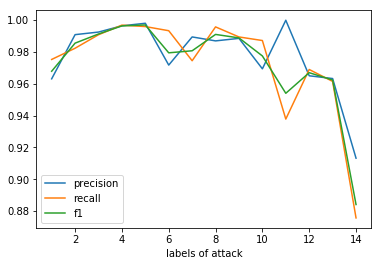

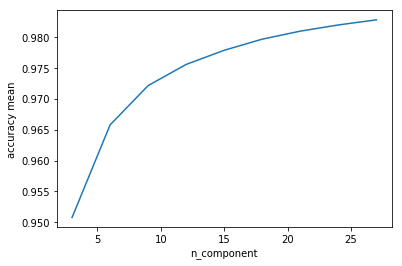

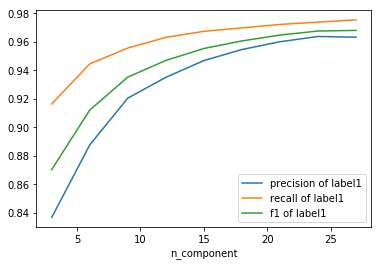

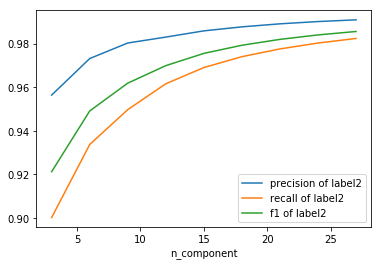

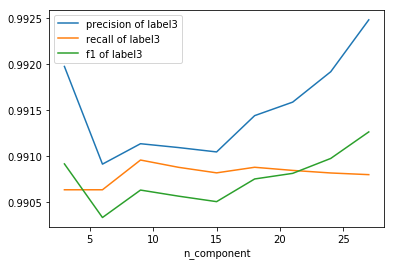

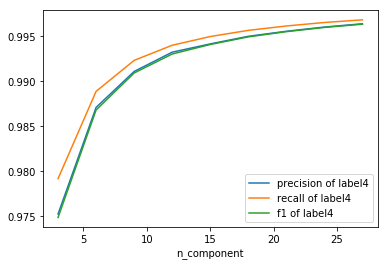

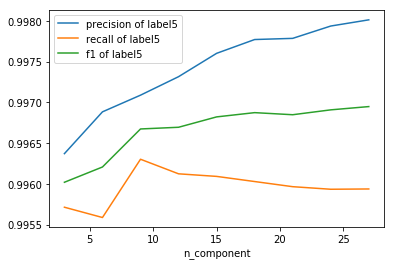

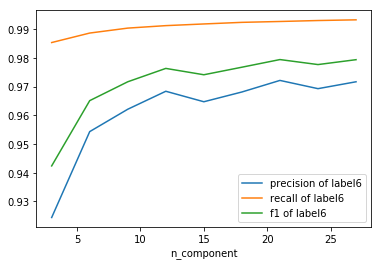

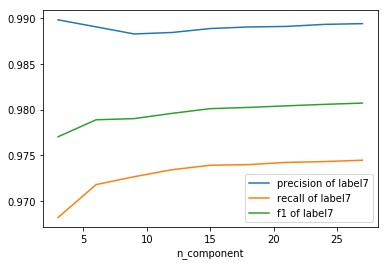

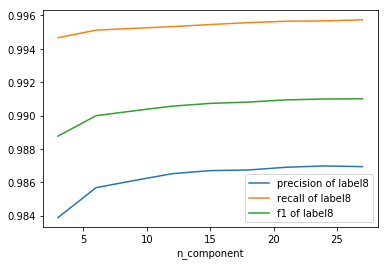

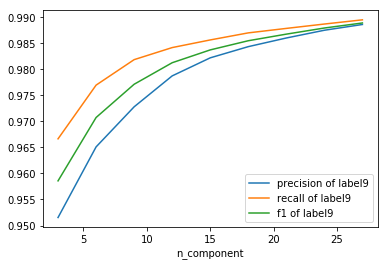

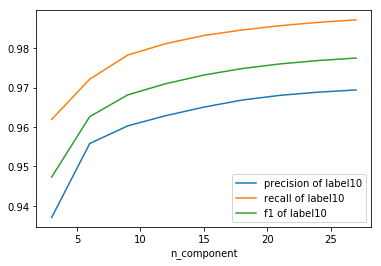

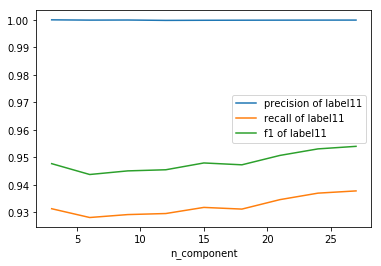

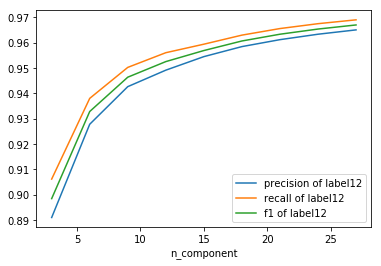

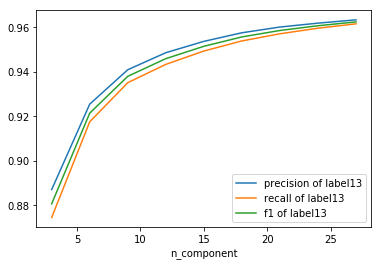

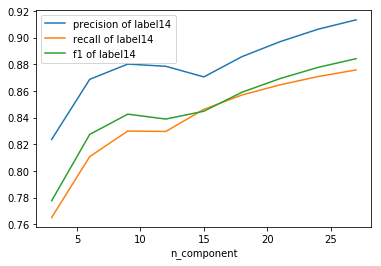

pca compressed dimension is： 30
Running time: 130.60547760000009 seconds
accuracy_mean value is : 0.9833900957483612


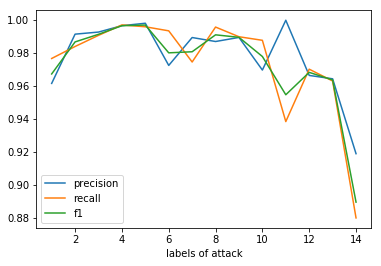

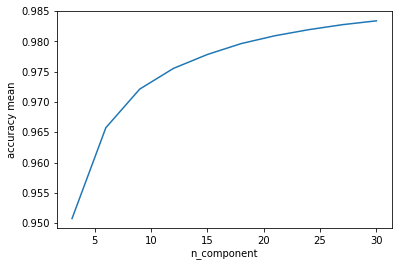

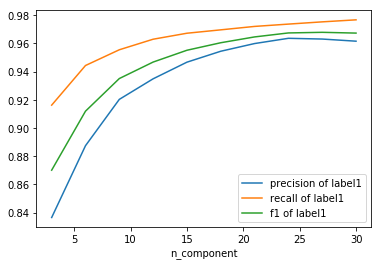

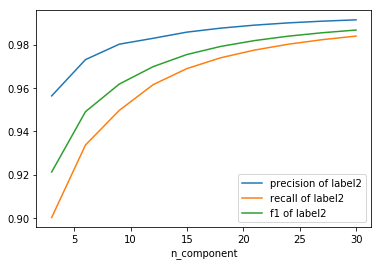

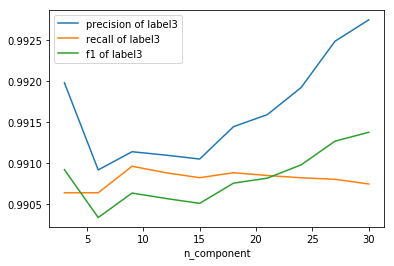

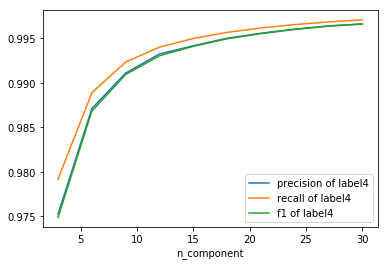

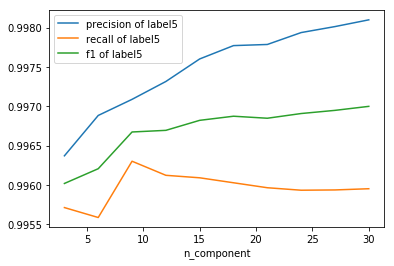

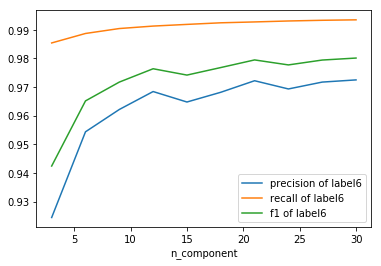

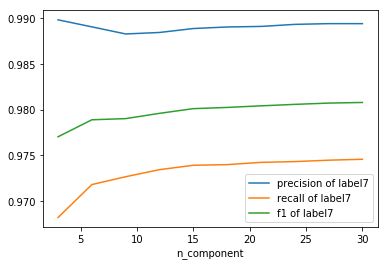

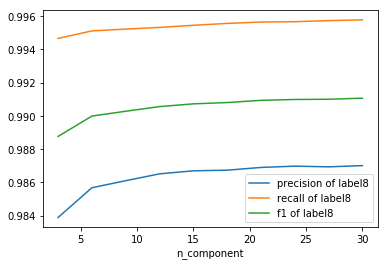

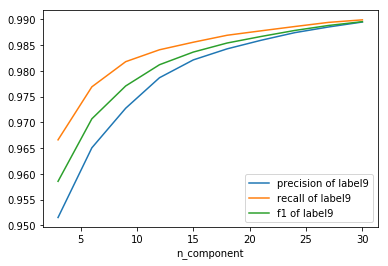

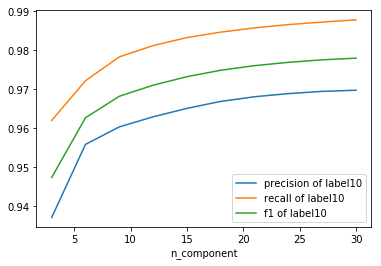

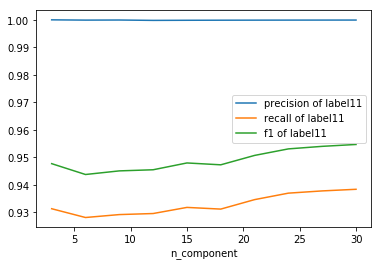

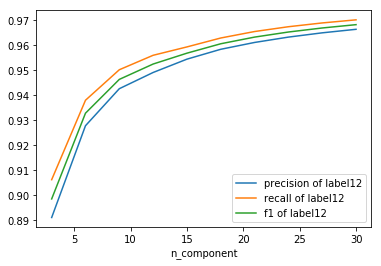

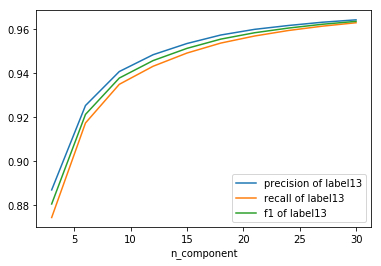

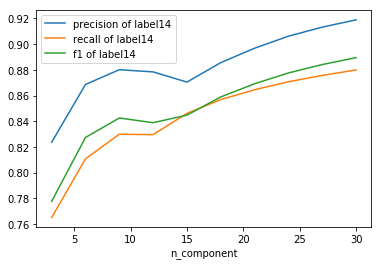

pca compressed dimension is： 33
Running time: 130.38810709999962 seconds
accuracy_mean value is : 0.9839426943985853


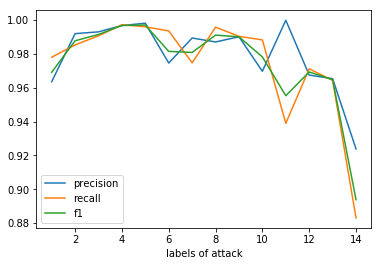

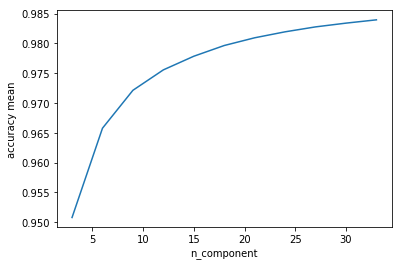

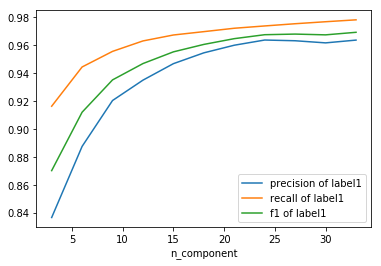

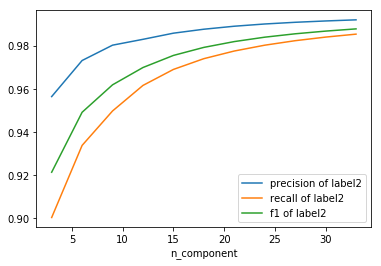

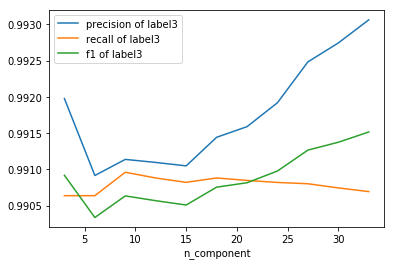

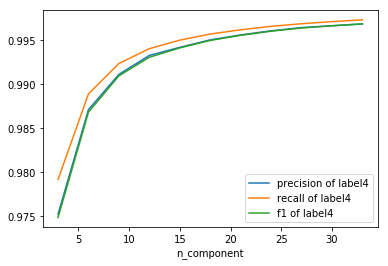

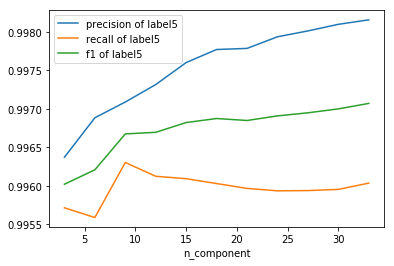

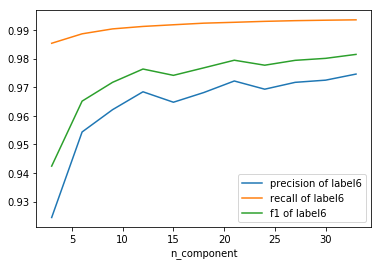

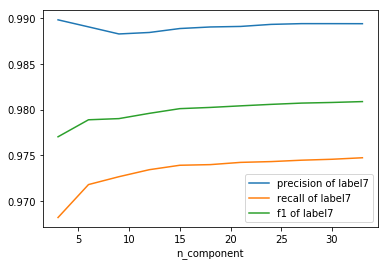

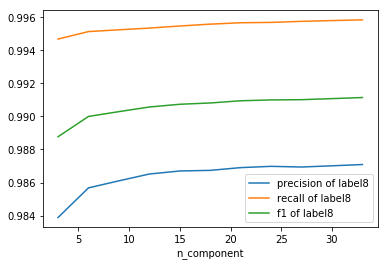

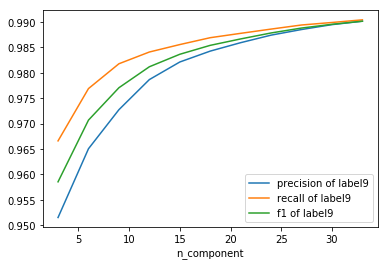

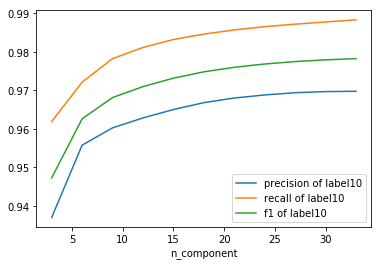

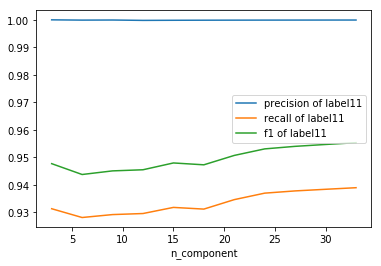

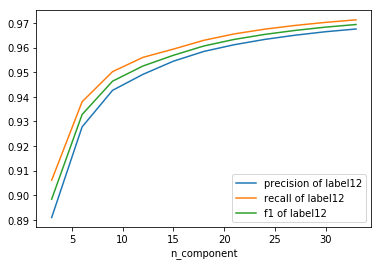

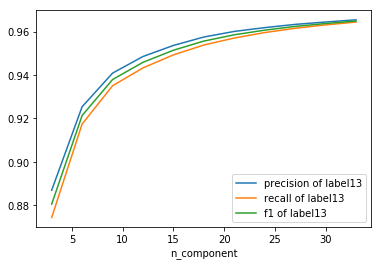

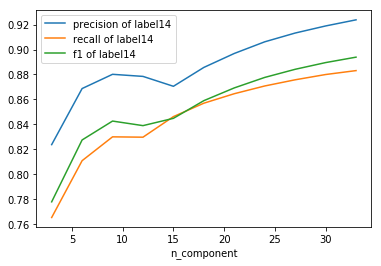

pca compressed dimension is： 36
Running time: 152.56925880000017 seconds
accuracy_mean value is : 0.9844041235576347


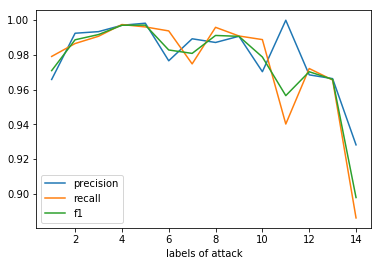

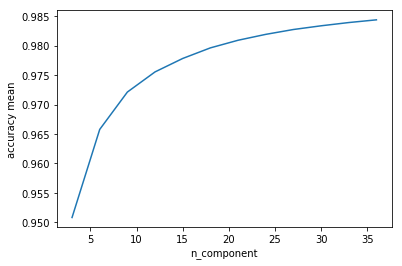

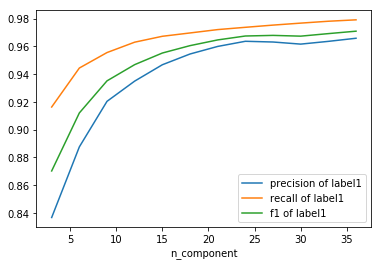

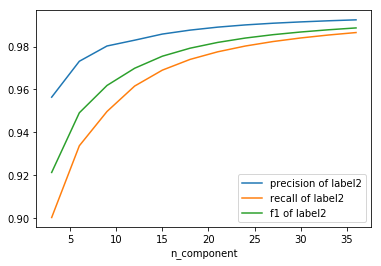

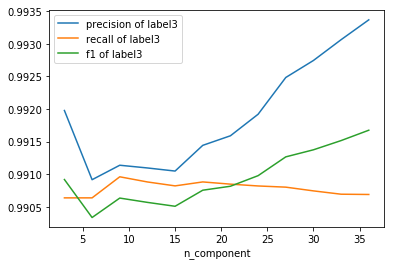

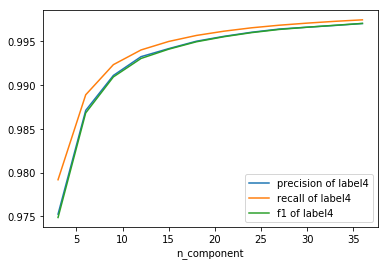

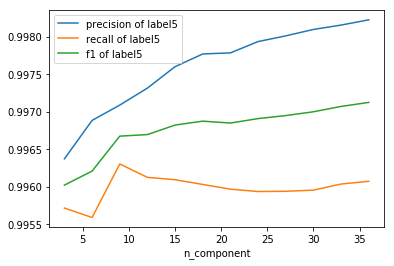

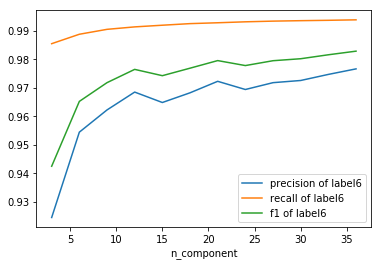

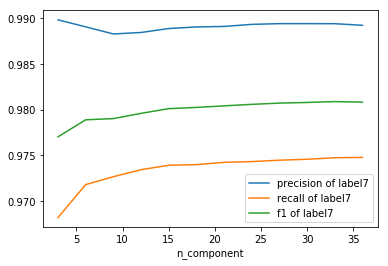

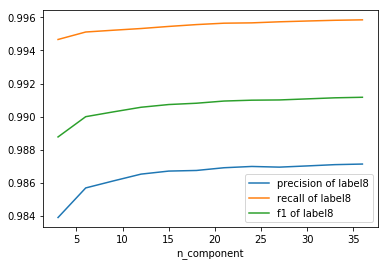

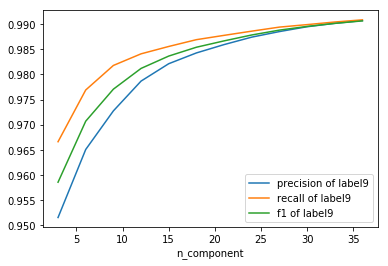

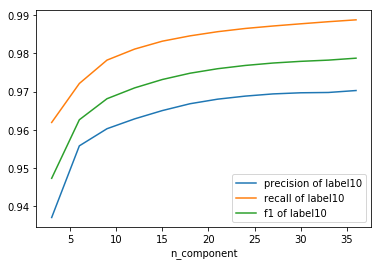

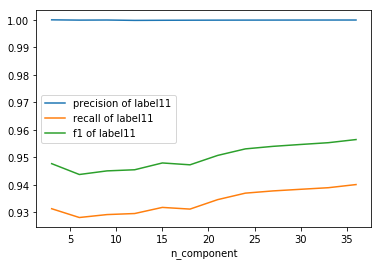

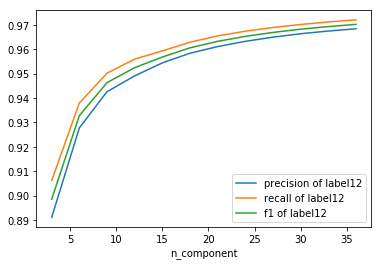

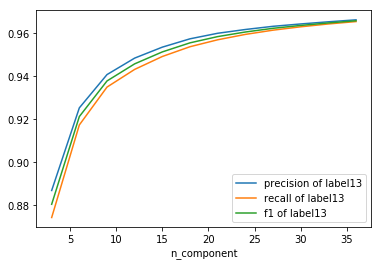

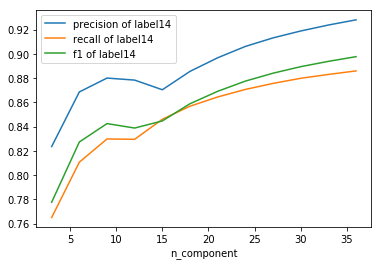

pca compressed dimension is： 39
Running time: 158.94425729999966 seconds
accuracy_mean value is : 0.9848297439926007


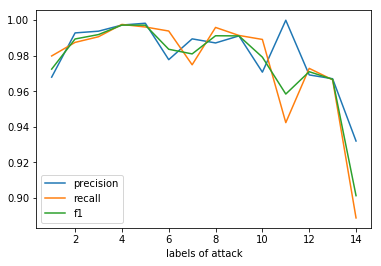

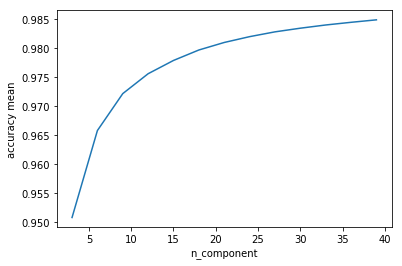

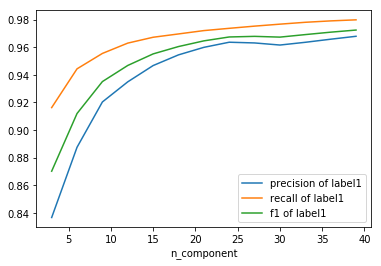

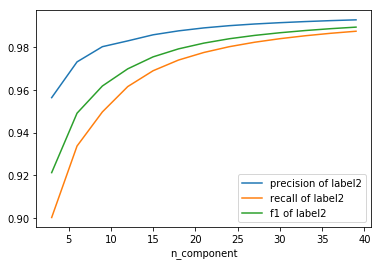

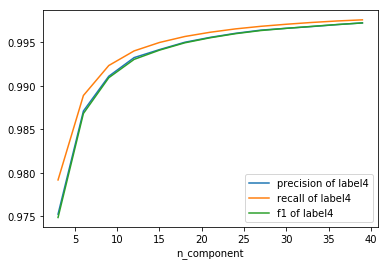

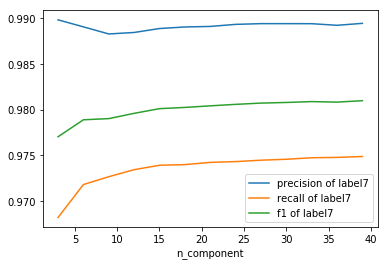

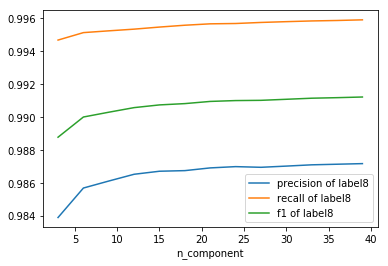

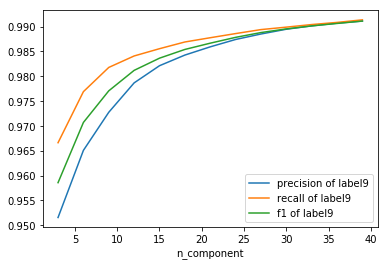

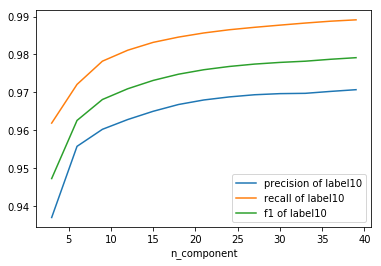

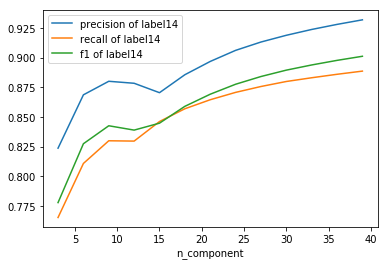

pca compressed dimension is： 42
Running time: 163.1209729000002 seconds
accuracy_mean value is : 0.9851853261503574


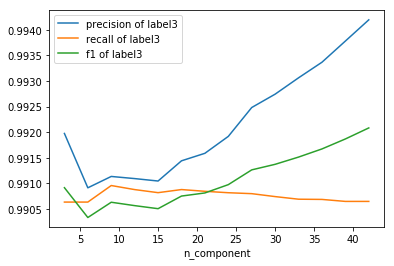

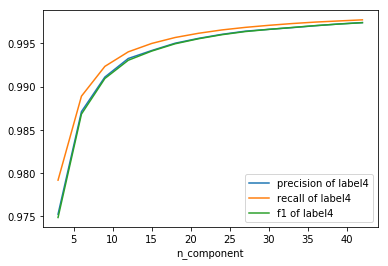

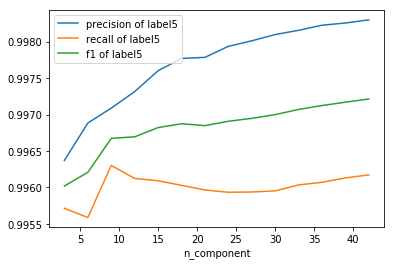

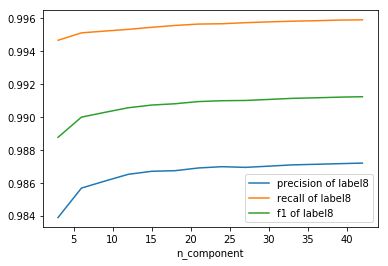

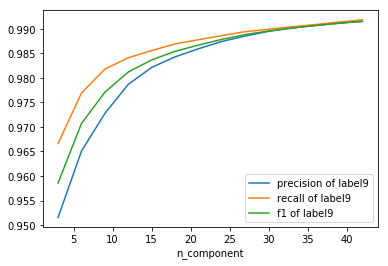

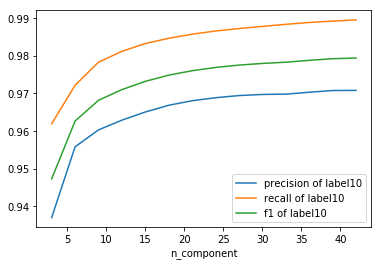

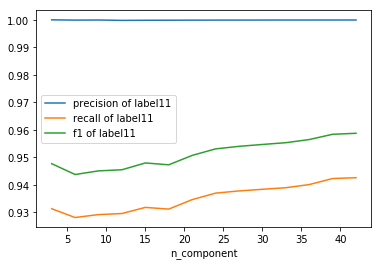

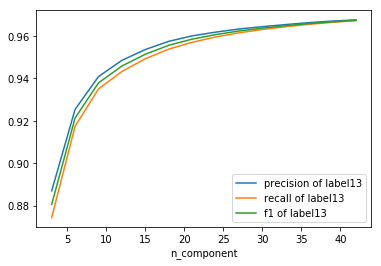

pca compressed dimension is： 45
Running time: 155.24389969999902 seconds
accuracy_mean value is : 0.9855253682866318


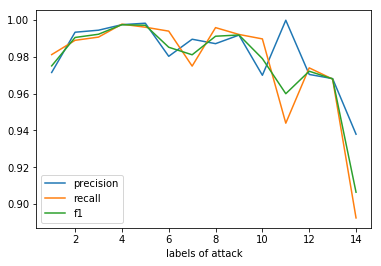

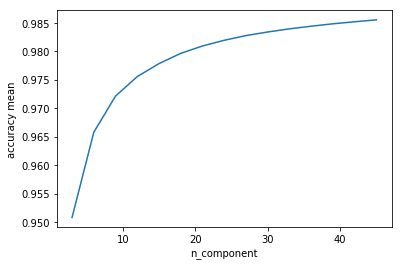

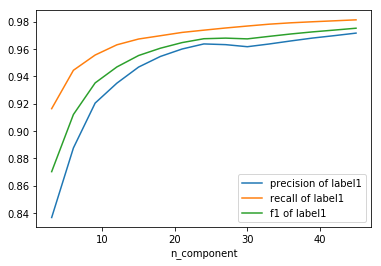

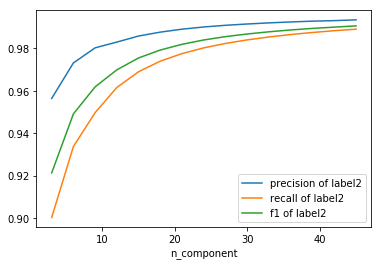

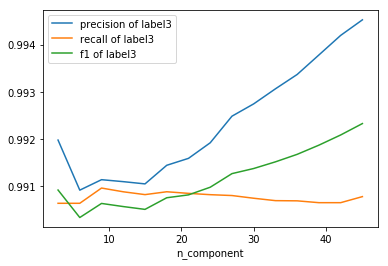

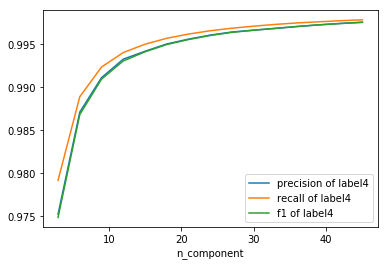

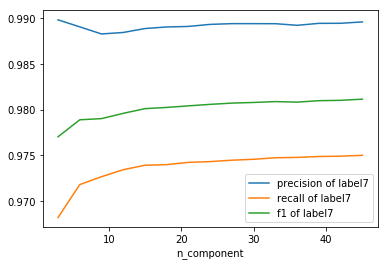

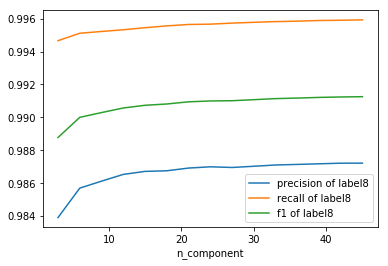

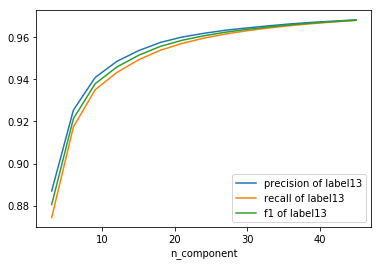

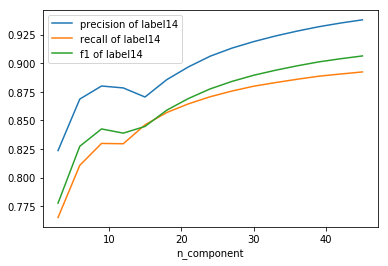

pca compressed dimension is： 48
Running time: 154.66184910000084 seconds
accuracy_mean value is : 0.9858035017965777


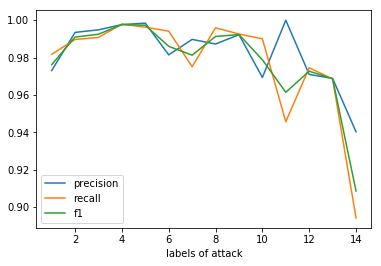

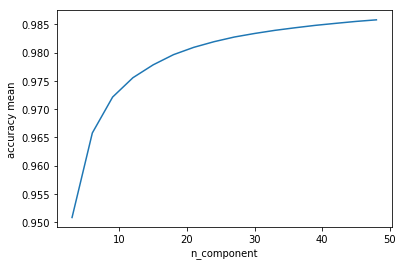

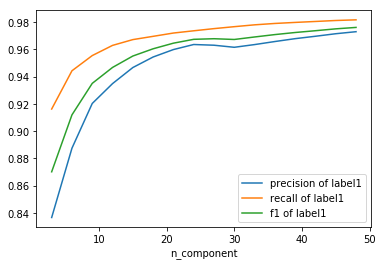

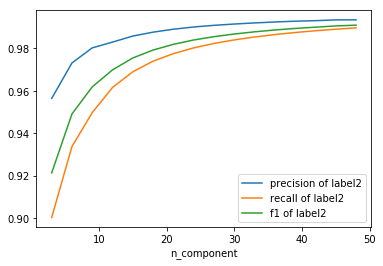

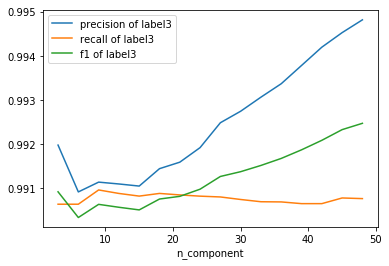

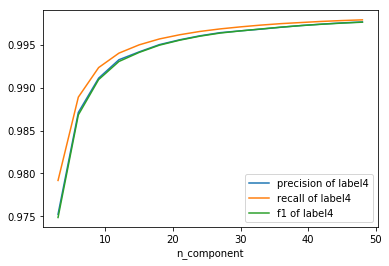

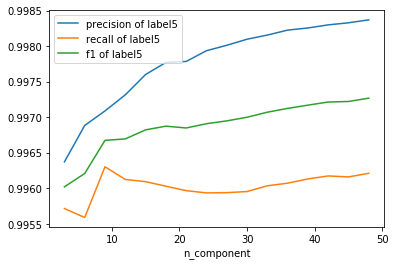

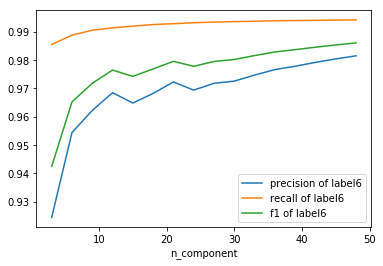

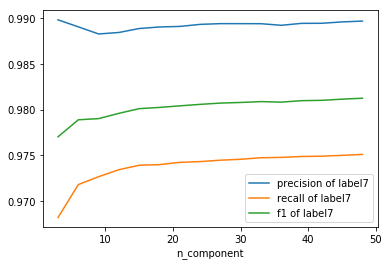

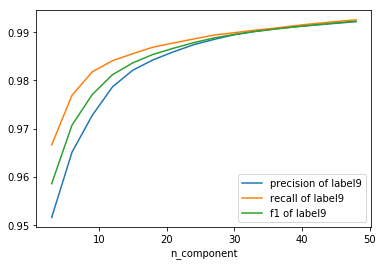

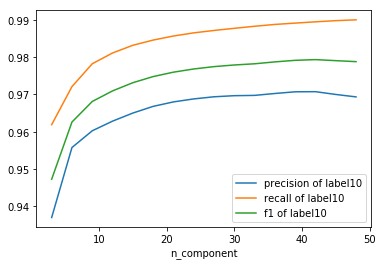

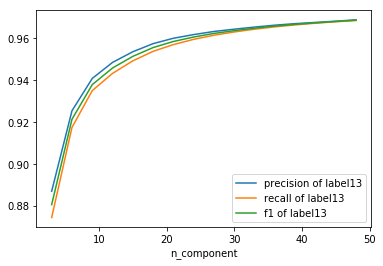

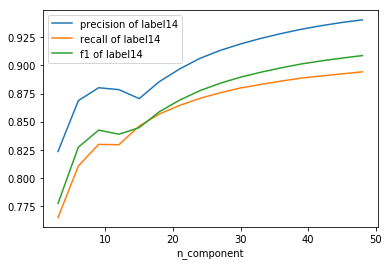

pca compressed dimension is： 51
Running time: 178.14624980000008 seconds
accuracy_mean value is : 0.9860637502343051


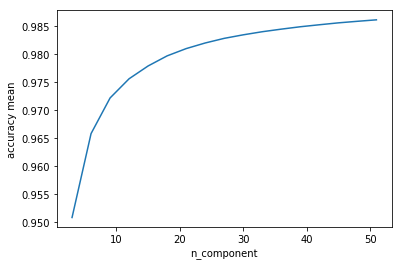

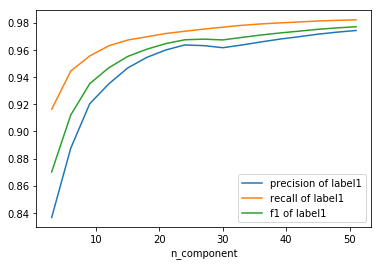

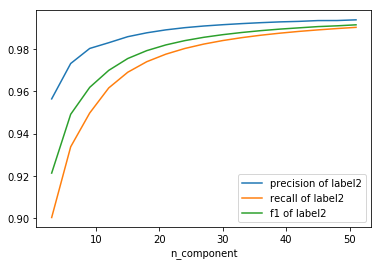

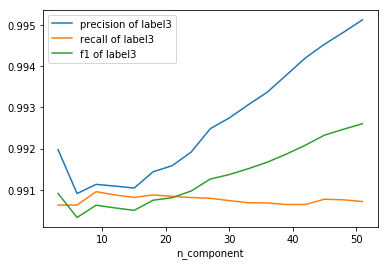

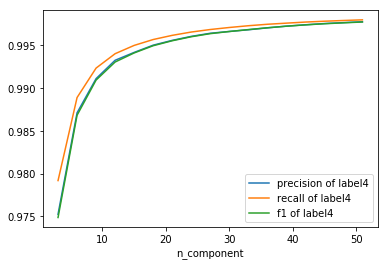

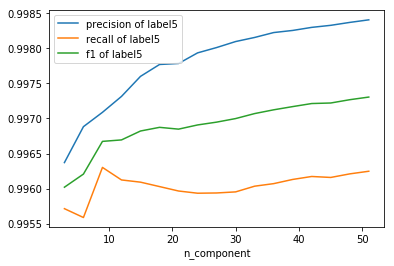

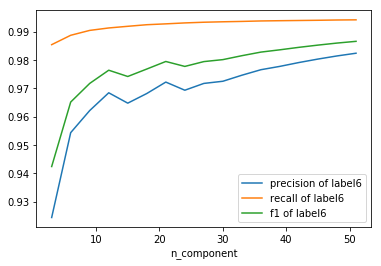

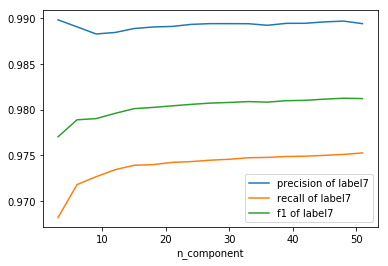

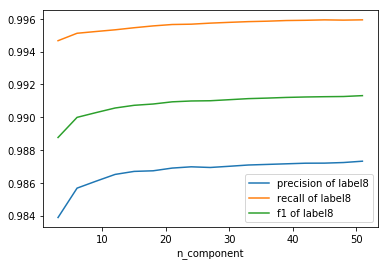

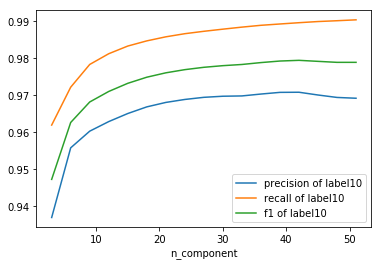

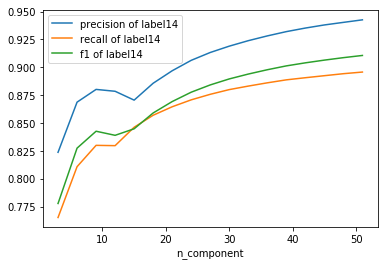

pca compressed dimension is： 54
Running time: 177.09351719999904 seconds
accuracy_mean value is : 0.9862901152943749


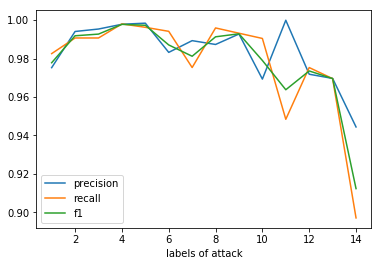

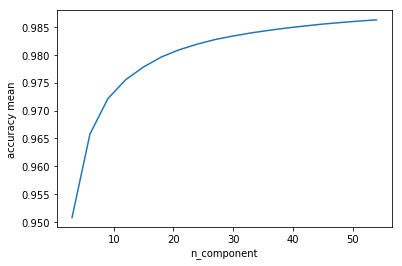

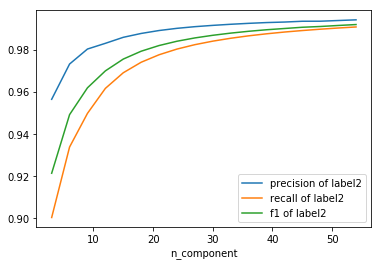

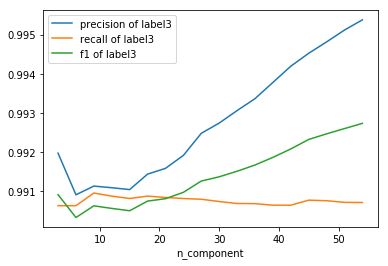

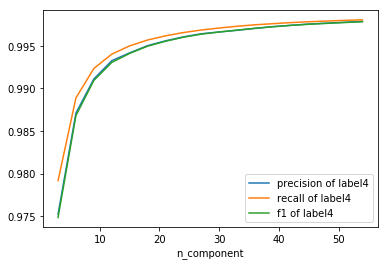

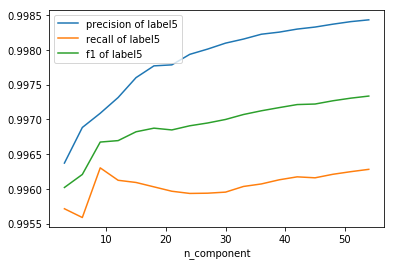

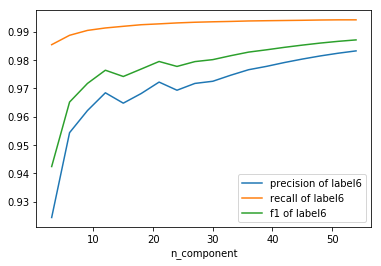

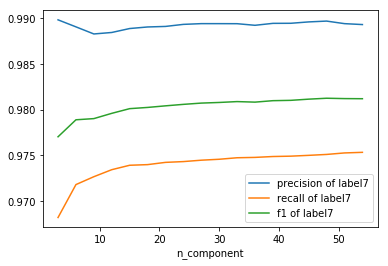

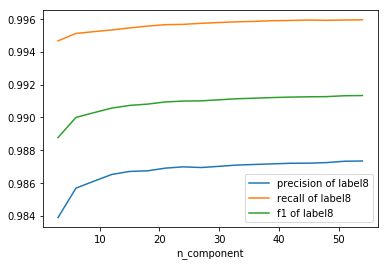

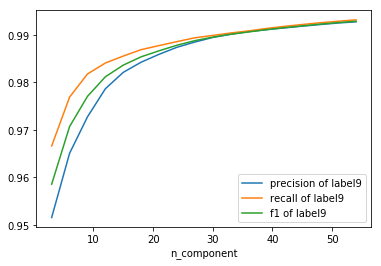

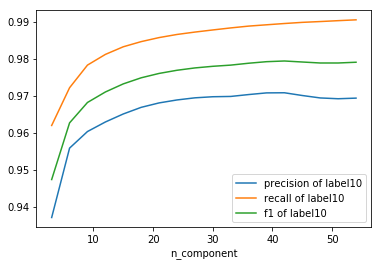

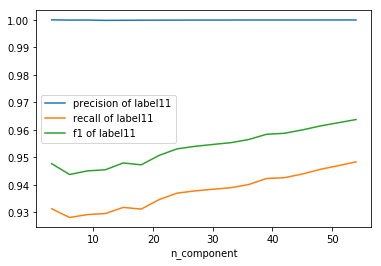

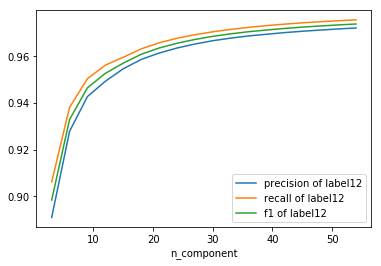

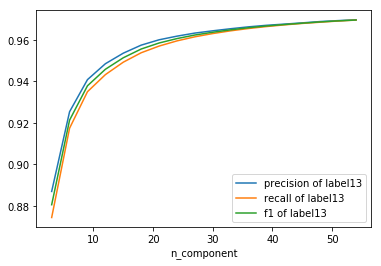

pca compressed dimension is： 57
Running time: 176.61582740000085 seconds
accuracy_mean value is : 0.9864905114785161


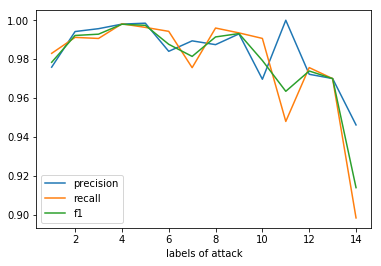

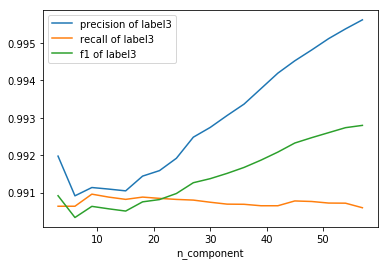

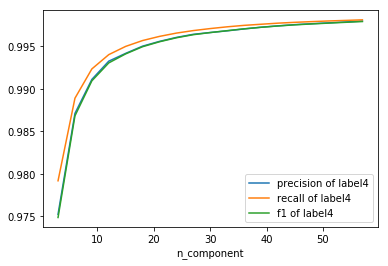

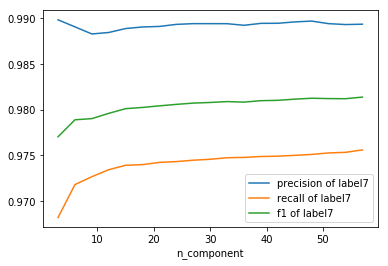

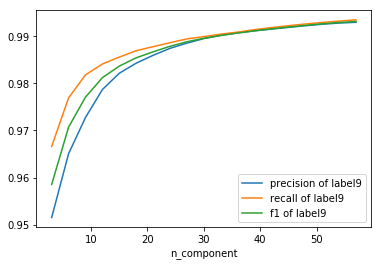

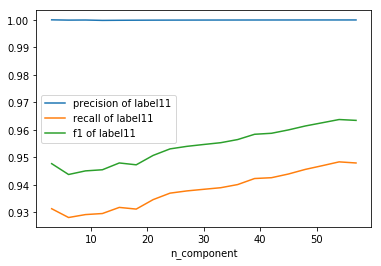

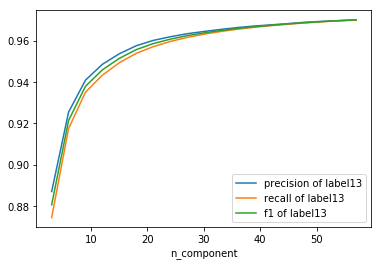

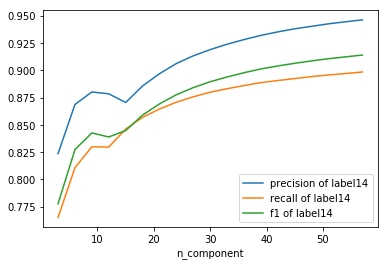

pca compressed dimension is： 60
Running time: 184.84078289999889 seconds
accuracy_mean value is : 0.9866812424206803


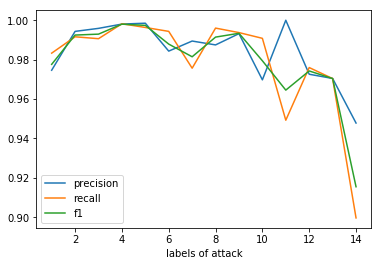

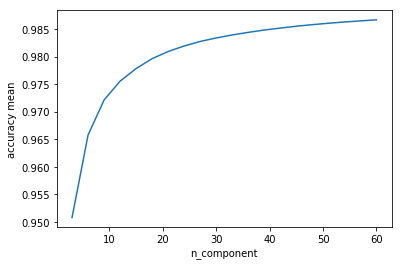

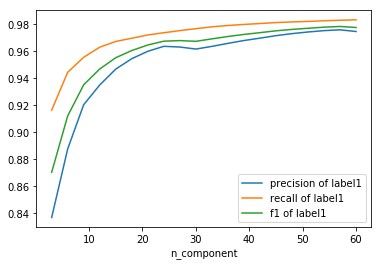

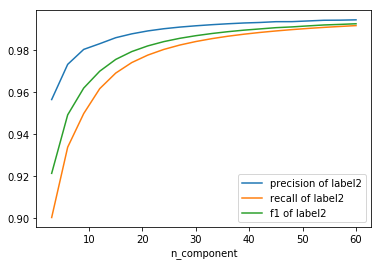

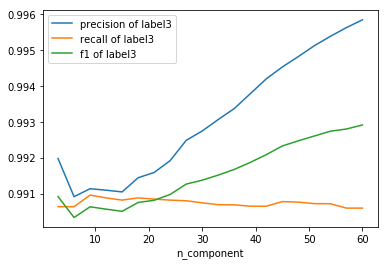

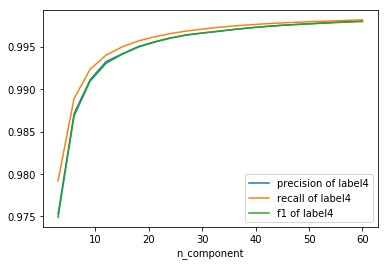

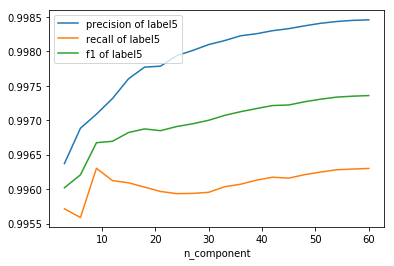

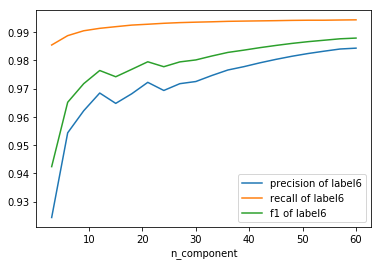

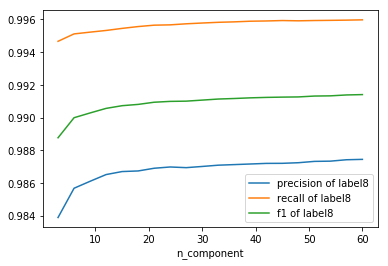

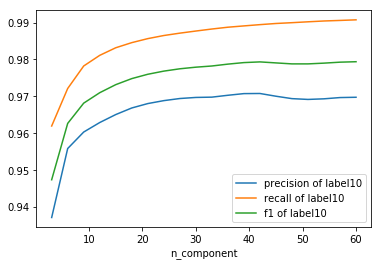

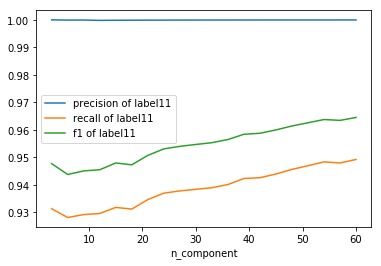

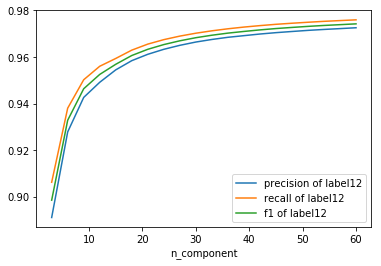

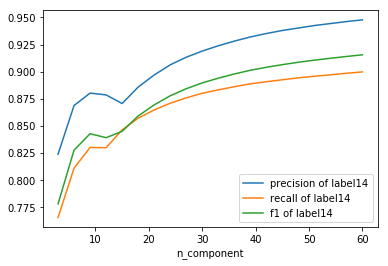

pca compressed dimension is： 63
Running time: 182.98491579999973 seconds
accuracy_mean value is : 0.9868868744074527


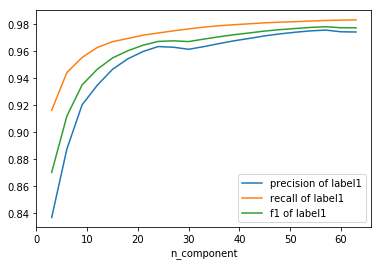

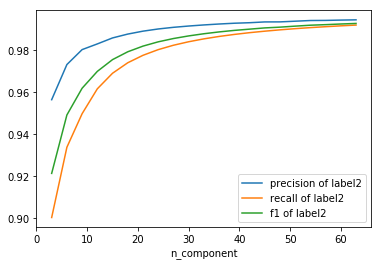

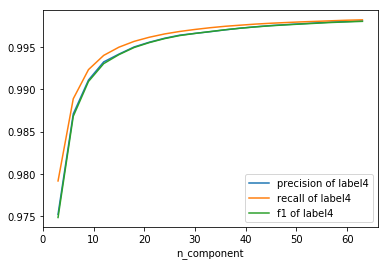

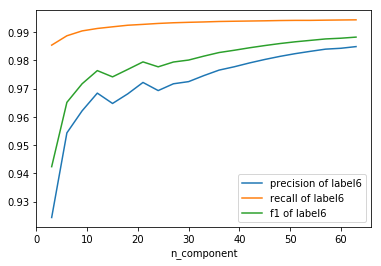

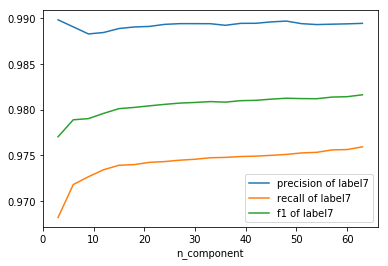

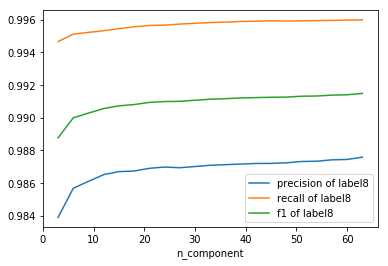

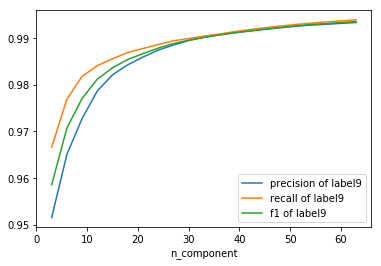

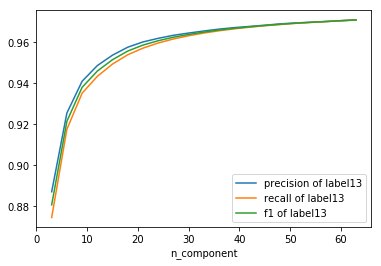

pca compressed dimension is： 66
Running time: 164.55866610000157 seconds
accuracy_mean value is : 0.9870634748085816


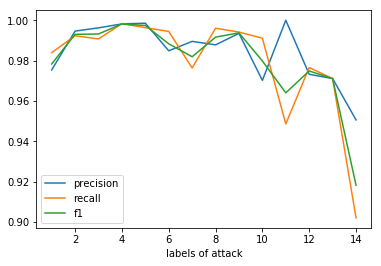

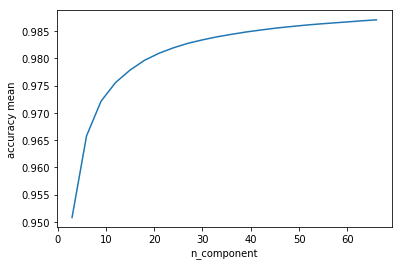

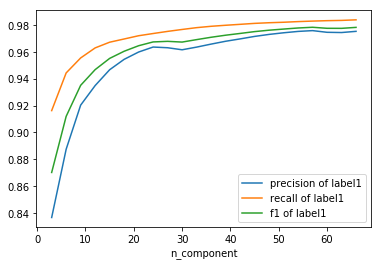

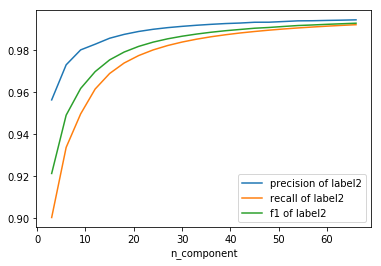

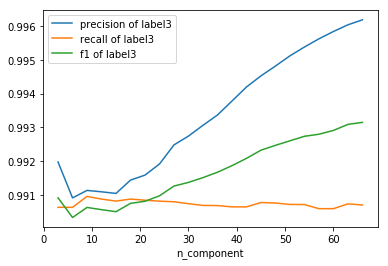

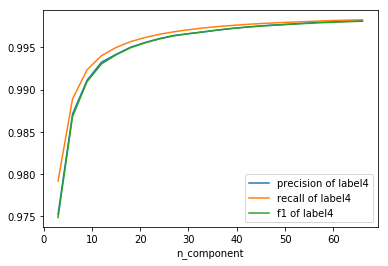

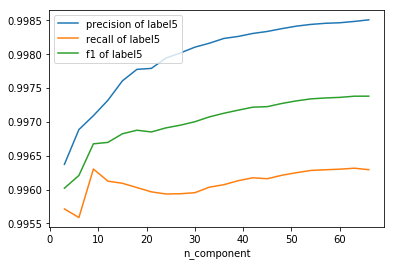

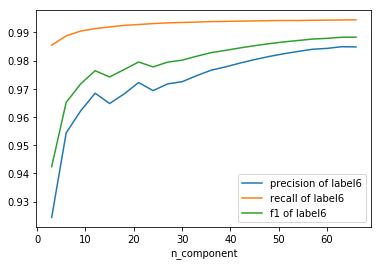

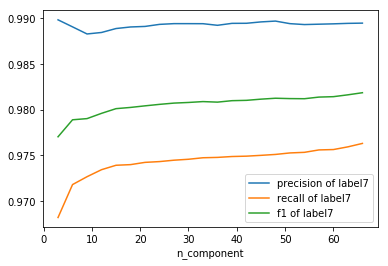

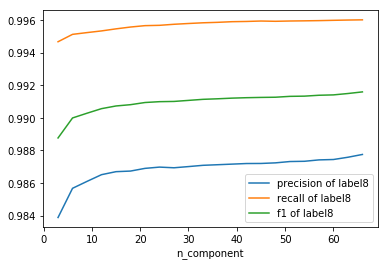

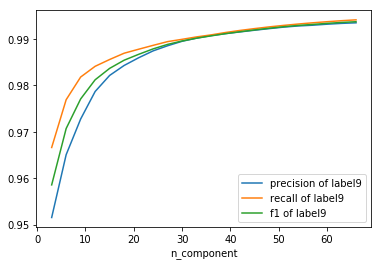

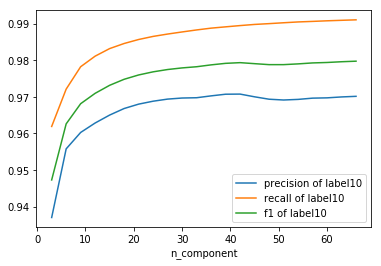

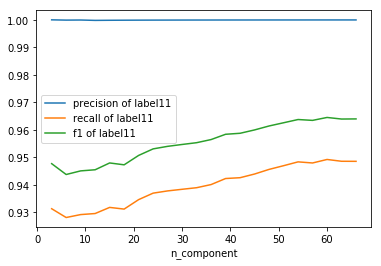

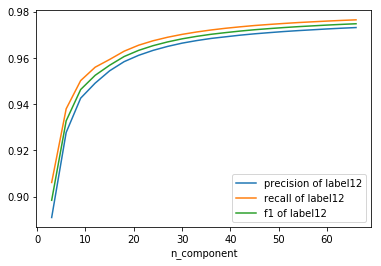

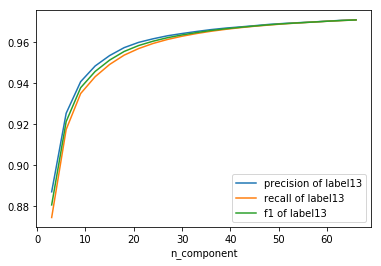

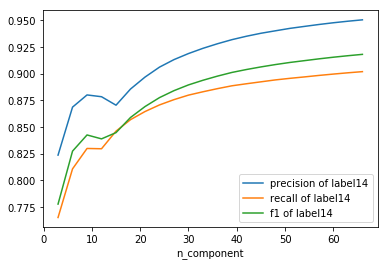

pca compressed dimension is： 69
Running time: 158.75452420000147 seconds
accuracy_mean value is : 0.9872033755391803


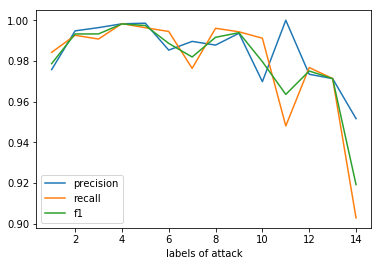

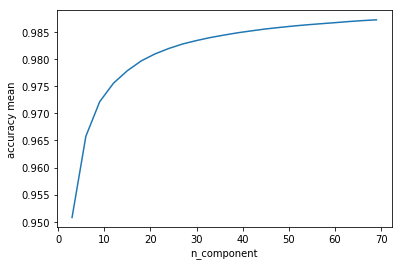

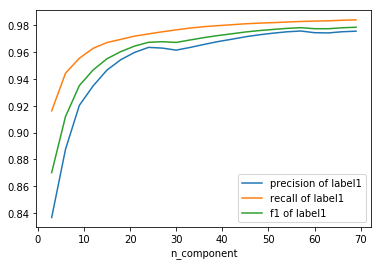

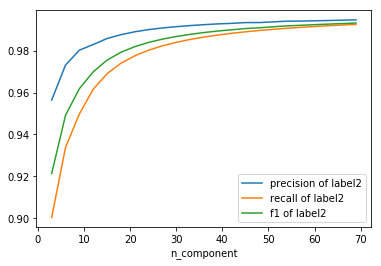

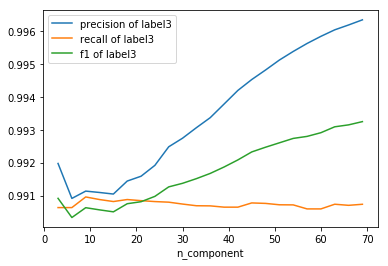

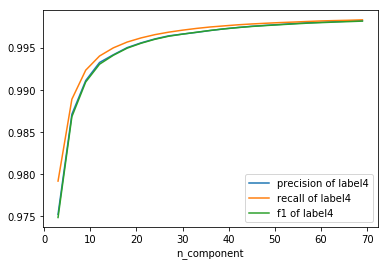

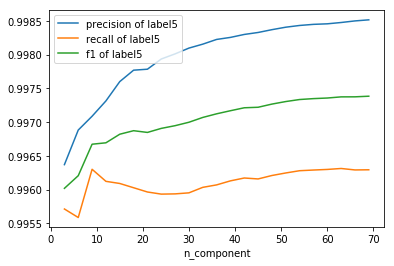

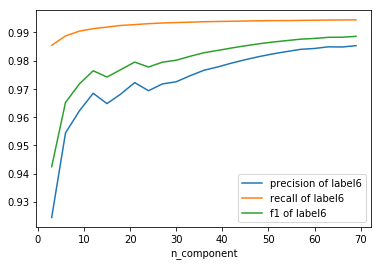

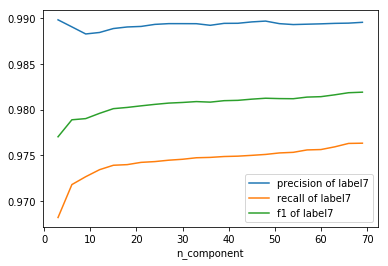

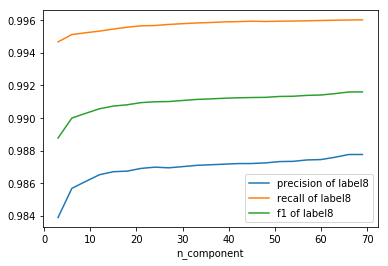

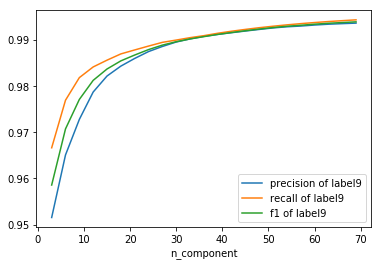

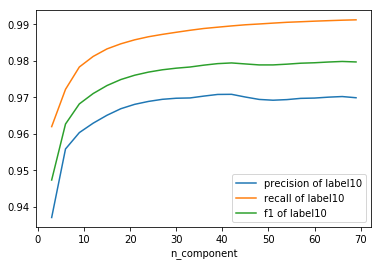

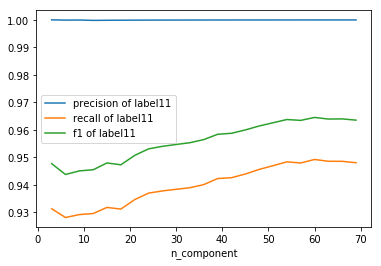

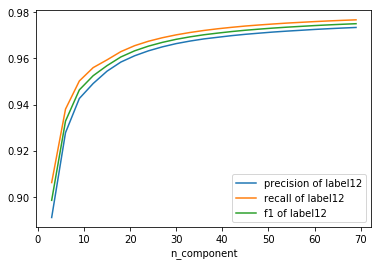

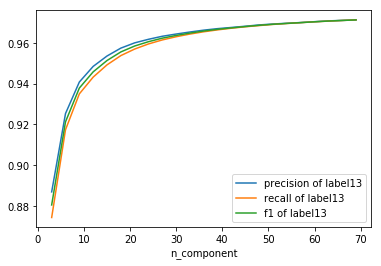

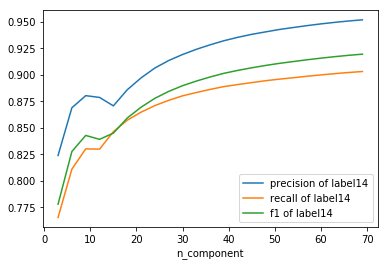

pca compressed dimension is： 72
Running time: 161.0283653000006 seconds
accuracy_mean value is : 0.9873165531574227


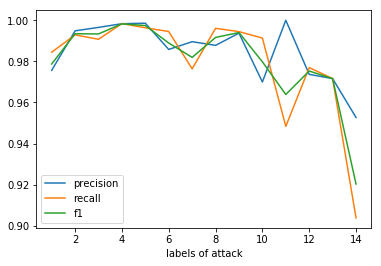

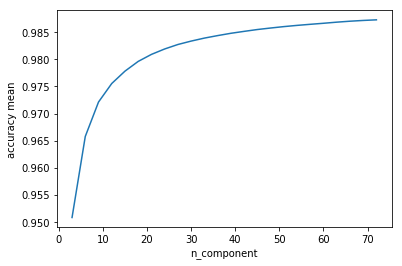

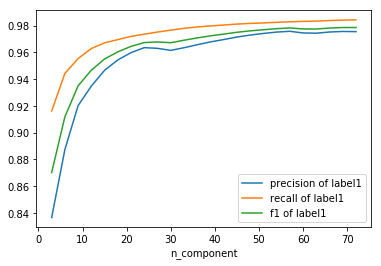

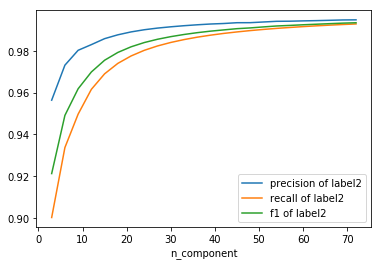

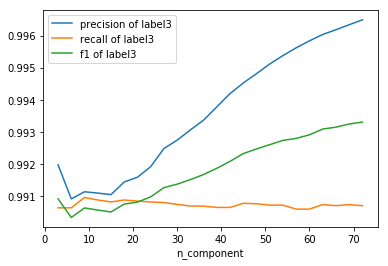

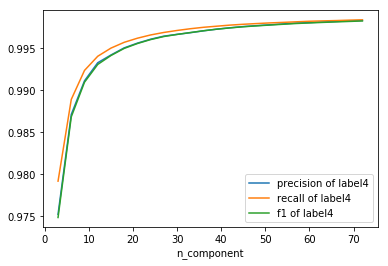

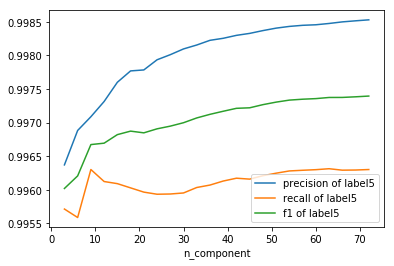

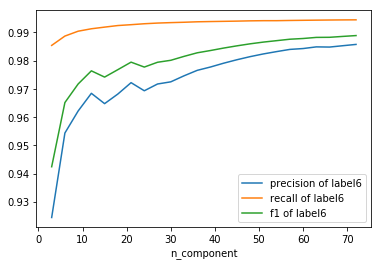

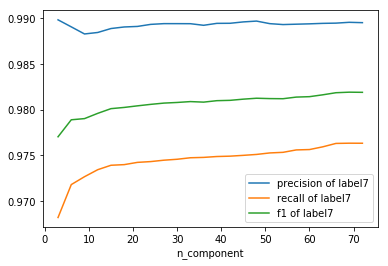

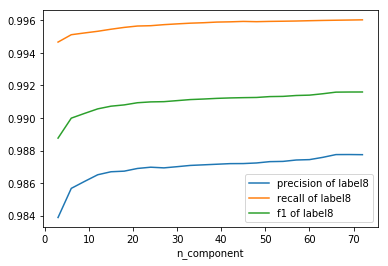

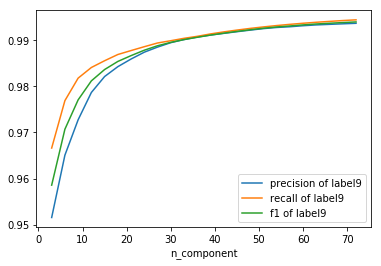

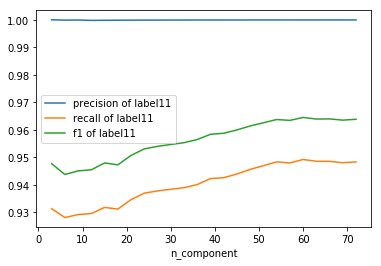

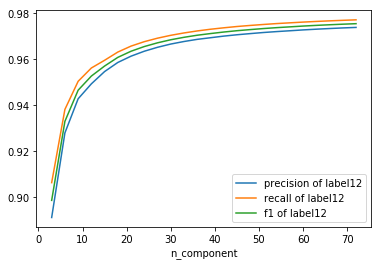

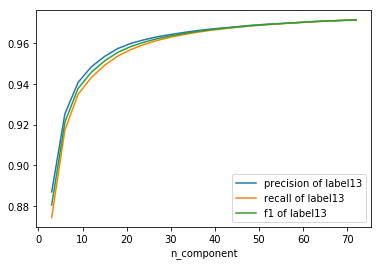

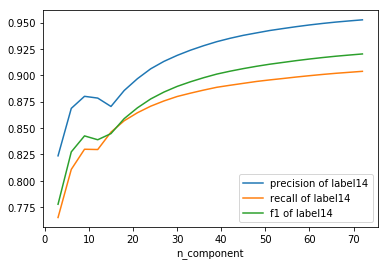

pca compressed dimension is： 75
Running time: 155.00337690000015 seconds
accuracy_mean value is : 0.9874478456677771


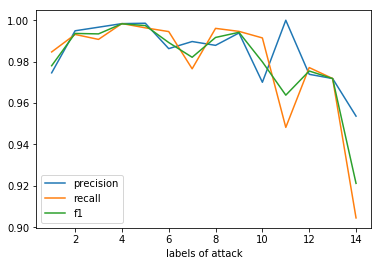

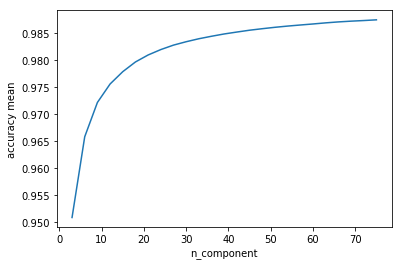

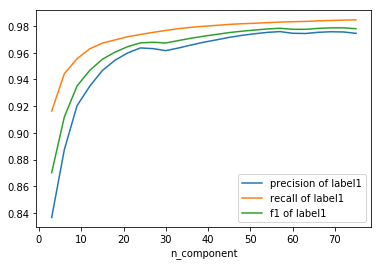

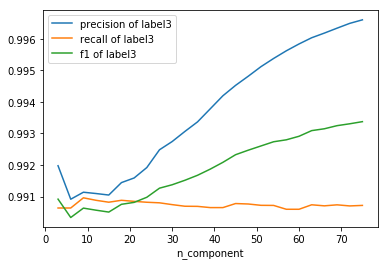

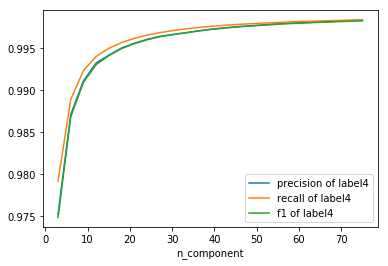

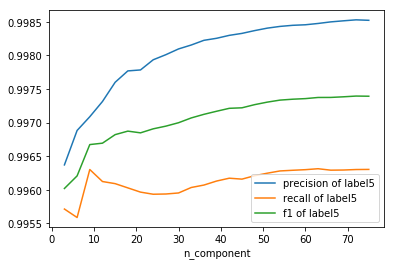

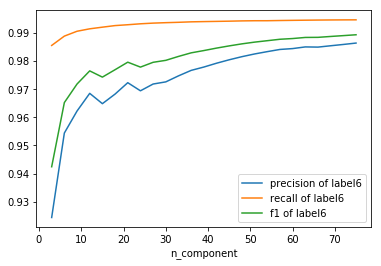

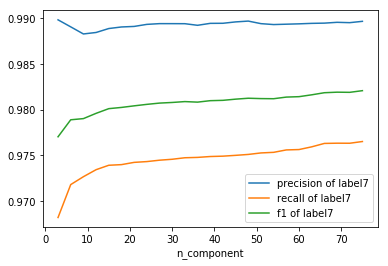

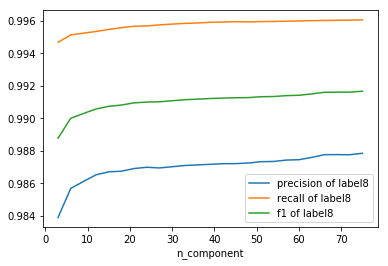

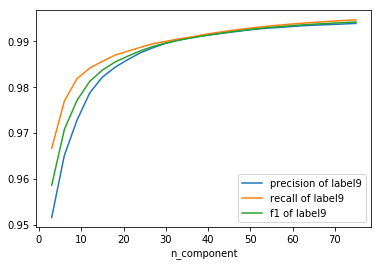

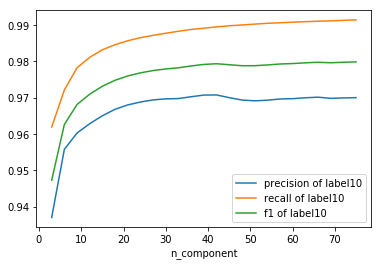

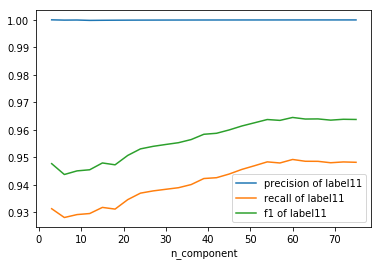

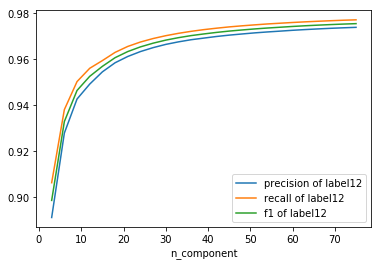

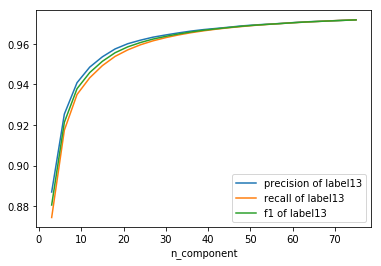

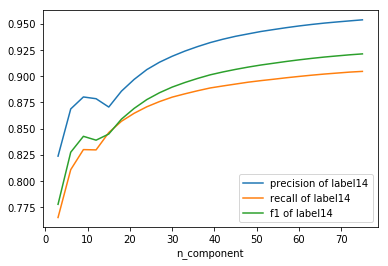

pca compressed dimension is： 78
Running time: 156.36549839999498 seconds
accuracy_mean value is : 0.9875493611584012


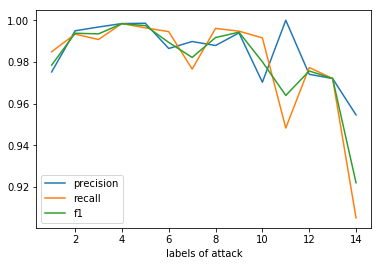

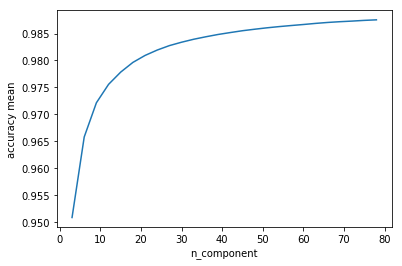

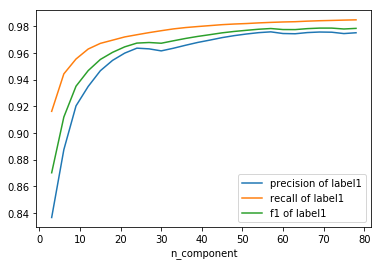

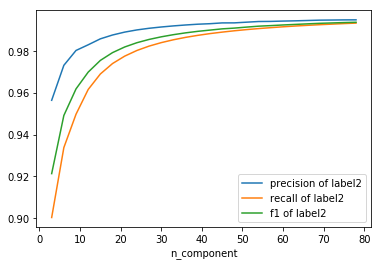

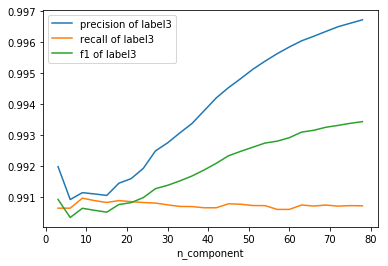

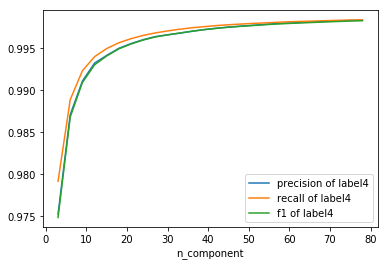

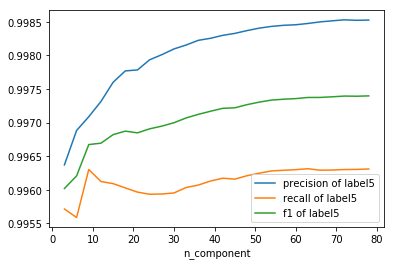

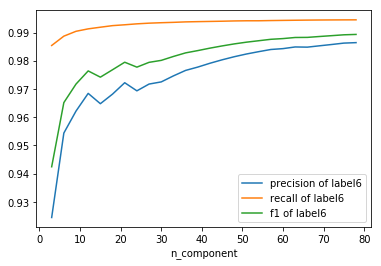

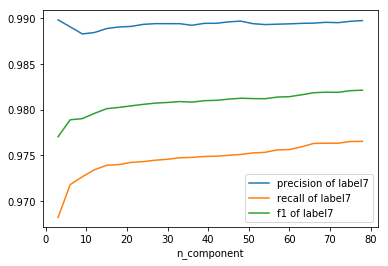

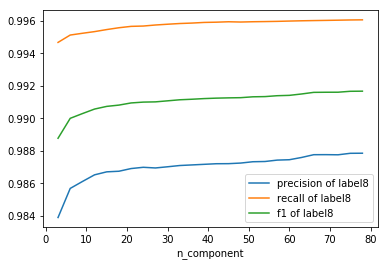

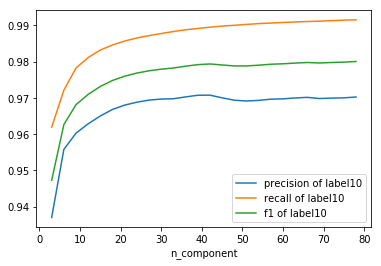

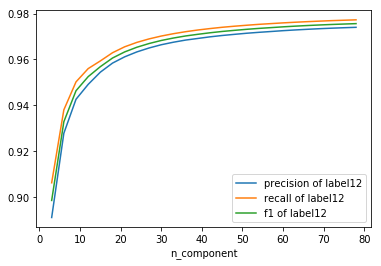

In [4]:
if __name__ == "__main__":
    run_pca()